In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib.cm as cm
import warnings
import seaborn as sns

In [0]:
excel_file="/content/EU-PE-Auction Database (1).xlsx"
data = pd.read_excel(excel_file, merge_cells=False)

In [0]:
targ_adv = pd.read_excel(excel_file, sheet_name=2)

In [0]:
targ_adv.head()

,Target,company description,Industry,Geography,Advisor,Advisor Type,Auction status,Unnamed: 7
0,Forthnet,Telecom,Telecommunication,Greece,Nomura,FA,Live,FA
1,Acciona's portolio of concessions,Motorway concession operator,Transport,Spain,Credit Agricole,FA,Live,LA
2,Virgin Atlantic,Airlines,Transport,UK,Houilhan Lokey,FA,Live,NaN
3,Virgin Atlantic,Airlines,Transport,UK,Alvarez & Marshal,FA,Live,NaN
4,eBay's classifieds auction,Classified business,Media,US,Goldman Sachs,FA,Live,NaN


In [0]:
targ_adv.columns  # columns present in target adviser data

Index(['Target', 'company description', 'Industry', 'Geography', 'Advisor',
       'Advisor Type', 'Auction status', 'Unnamed: 7'],
      dtype='object')

In [0]:
targ_adv.shape  # actual shape of target adviser data

(403, 8)

In [0]:
# Here we can see that we have total 8 columns with 403 records in target adviser data

In [0]:
# lets check data statistically

In [0]:
targ_adv.describe()

,Target,company description,Industry,Geography,Advisor,Advisor Type,Auction status,Unnamed: 7
count,403,402,402,402,329,326,400,2
unique,322,295,52,33,197,5,8,2
top,Groupe Panhard,Software company,Consumer,UK,Rothschild,FA,Live,LA
freq,6,8,69,93,19,288,129,1


In [0]:
targ_adv.isnull().sum()

Target                   0
company description      1
Industry                 1
Geography                1
Advisor                 74
Advisor Type            77
Auction status           3
Unnamed: 7             401
dtype: int64

In [0]:
# From above description we can say as below:
# 1. last unnamed column has no use which has maximum null or blank values, so we can remove that from our dataset
# 2. Three columns (company description, Industry, Geography) have only 1 missing value and we treat them either by removing or by replacement
# 3.  Advisor, Advisor Type are two columns having 74 & 77 values missing in data. I think these are most important columns based on which we have to find trends of data.So we have remove these.
# 4. There are 322 unique target companies. with unique 295 company description.
# 5. There are unique 52 industries & 33 unique geography
# 6. There are 5 unique types of advisers with unique 197 in number for all records with
# 7. There  are 8 auction status present in data
# 8. Top column in description represents the most frequent value w.r.t. that column in data
# 9.  Frequency represents how many times a value came in data(how frequent it is)

In [0]:
# Lets first treat missing values in data preprocessing

In [0]:
targ_adv.drop(targ_adv.columns[[7]], 1, inplace=True)

In [0]:
targ_adv.isnull().sum()

Target                  0
company description     1
Industry                1
Geography               1
Advisor                74
Advisor Type           77
Auction status          3
dtype: int64

In [0]:
targ_adv.dropna(inplace=True) # removed missing values present in data

In [0]:
targ_adv.isnull().sum()

Target                 0
company description    0
Industry               0
Geography              0
Advisor                0
Advisor Type           0
Auction status         0
dtype: int64

In [0]:
# Now our data is cleaned

In [0]:
print("The shape of target adviser data after cleaning is", targ_adv.shape)

The shape of target adviser data after cleaning is (321, 7)


In [0]:
# It's size dropped from 403 to 320 now.In this cleaned data we will find required trends and relations now.

In [0]:
# Data can be analysed univariately and bivariately.
# 1. UNIVARIATE ANALYSIS
# 2. BIVARIATE ANALYSIS

In [0]:
# In univariate analysis, I will analyse my target variable(which i am taking Advisor as target variable) w.r.t all other variable obe one to see if there is any relation or trend.

In [0]:
# To do univariate analysis firstly we have to check datatypes of all variables
targ_adv.dtypes

Target                 object
company description    object
Industry               object
Geography              object
Advisor                object
Advisor Type           object
Auction status         object
dtype: object

In [0]:
# We have all categorical variables.For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.
# We will first look at the target variable, i.e., Advisor. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot..
# Lets start

In [0]:
targ_adv['Advisor'].value_counts(ascending=False)

Rothschild                                                                           19
Goldman Sachs                                                                        15
Deloitte                                                                              9
PwC                                                                                   8
KPMG                                                                                  7
                                                                                     ..
AFS Group                                                                             1
KeyBanc Capital Markets Inc., Numis Securities Limited, Canaccord Genuity Limited     1
Perella Weinberg Partners LP                                                          1
LionTree Advisors                                                                     1
Callisto                                                                              1
Name: Advisor, Length: 193, dtyp

In [0]:
targ_adv['Advisor'].value_counts(normalize=True, ascending=False) 
# we got the advisors list along with with their frequency percentage in descending order

Rothschild                                                                           0.059190
Goldman Sachs                                                                        0.046729
Deloitte                                                                             0.028037
PwC                                                                                  0.024922
KPMG                                                                                 0.021807
                                                                                       ...   
AFS Group                                                                            0.003115
KeyBanc Capital Markets Inc., Numis Securities Limited, Canaccord Genuity Limited    0.003115
Perella Weinberg Partners LP                                                         0.003115
LionTree Advisors                                                                    0.003115
Callisto                                                    

In [0]:
frequencies=targ_adv['Advisor'].value_counts()
condition = frequencies<5   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_adv['Advisor'] = targ_adv['Advisor'].replace(mask_dict)  # or you could make a copy not to modify original data

In [0]:
targ_adv['Advisor'].value_counts()  # we have taken top advisors with frequency 5 or more which are total 11 in number and others which have frequency less than 5 is under miscellaneous

miscellaneous     232
Rothschild         19
Goldman Sachs      15
Deloitte            9
PwC                 8
KPMG                7
PwC                 6
JPMorgan            5
DC Advisory         5
Houlihan Lokey      5
Lazard              5
Morgan Stanley      5
Name: Advisor, dtype: int64

In [0]:
# It is showing clearly Rothschild contribute most of all followed by Goldman Sachs . lets visulaize this

Text(0, 0.5, 'Count')

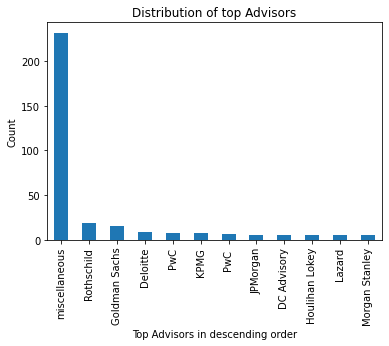

In [0]:
adv_plot=targ_adv['Advisor'].value_counts(ascending=False).plot.bar()
plt.title("Distribution of top Advisors")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Count")

In [0]:
targ_adv['Industry'].value_counts(ascending=False)

Consumer                            60
Medical                             33
Energy                              26
Technology                          26
Industrials                         25
Financial Services                  23
Services                            23
Leisure                             14
Media                               12
Transportation                      10
Internet / ecommerce                 6
Manufacturing                        5
Telecommunication                    5
Consumer                             5
Computer Software                    5
Transport                            4
Education                            4
Biotechnology                        3
Industrial                           3
Real Estate                          2
Construction                         2
Chemicals                            2
Consumer foods                       2
Industrial products and services     2
Agriculture                          2
IT                       

In [0]:
frequencies=targ_adv['Industry'].value_counts()
condition = frequencies<5   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_adv['Industry'] = targ_adv['Industry'].replace(mask_dict)  # or you could make a copy not to modify original data

In [0]:
targ_adv['Industry'].value_counts()

Consumer                60
miscellaneous           43
Medical                 33
Technology              26
Energy                  26
Industrials             25
Services                23
Financial Services      23
Leisure                 14
Media                   12
Transportation          10
Internet / ecommerce     6
Manufacturing            5
Computer Software        5
Consumer                 5
Telecommunication        5
Name: Industry, dtype: int64

In [0]:
# Now these above shown are top industries which are trending among advisors
# Lets visualize this

In [0]:
ind_adv=pd.crosstab(targ_adv['Advisor'], targ_adv['Industry'], margins=True, margins_name="Total")
ind_adv

Industry,Computer Software,Consumer,Consumer,Energy,Financial Services,Industrials,Internet / ecommerce,Leisure,Manufacturing,Media,Medical,Services,Technology,Telecommunication,Transportation,miscellaneous,Total
Advisor,,,,,,,,,,,,,,,,,
DC Advisory,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,5
Deloitte,0,4,0,0,2,1,0,0,0,0,1,0,0,0,1,0,9
Goldman Sachs,0,4,1,1,1,0,0,1,0,2,1,1,2,0,0,1,15
Houlihan Lokey,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,5
JPMorgan,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,5
KPMG,0,2,0,0,2,2,0,0,0,0,0,0,1,0,0,0,7
Lazard,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,1,5
Morgan Stanley,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,5
PwC,0,0,0,2,0,2,0,1,0,1,1,1,0,0,0,0,8


In [0]:
ind_adv.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_adv.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_adv.drop(['Total', 'miscellaneous'], 1, inplace=True)

In [0]:
ind_adv

Industry,Computer Software,Consumer,Consumer,Energy,Financial Services,Industrials,Internet / ecommerce,Leisure,Manufacturing,Media,Medical,Services,Technology,Telecommunication,Transportation
Advisor,,,,,,,,,,,,,,,
Rothschild,0,3,0,3,0,3,0,0,0,1,4,2,1,1,1
Goldman Sachs,0,4,1,1,1,0,0,1,0,2,1,1,2,0,0
Deloitte,0,4,0,0,2,1,0,0,0,0,1,0,0,0,1
PwC,0,0,0,2,0,2,0,1,0,1,1,1,0,0,0
KPMG,0,2,0,0,2,2,0,0,0,0,0,0,1,0,0
PwC,0,2,0,0,0,1,1,0,0,0,1,0,0,0,0
DC Advisory,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
Houlihan Lokey,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
JPMorgan,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0


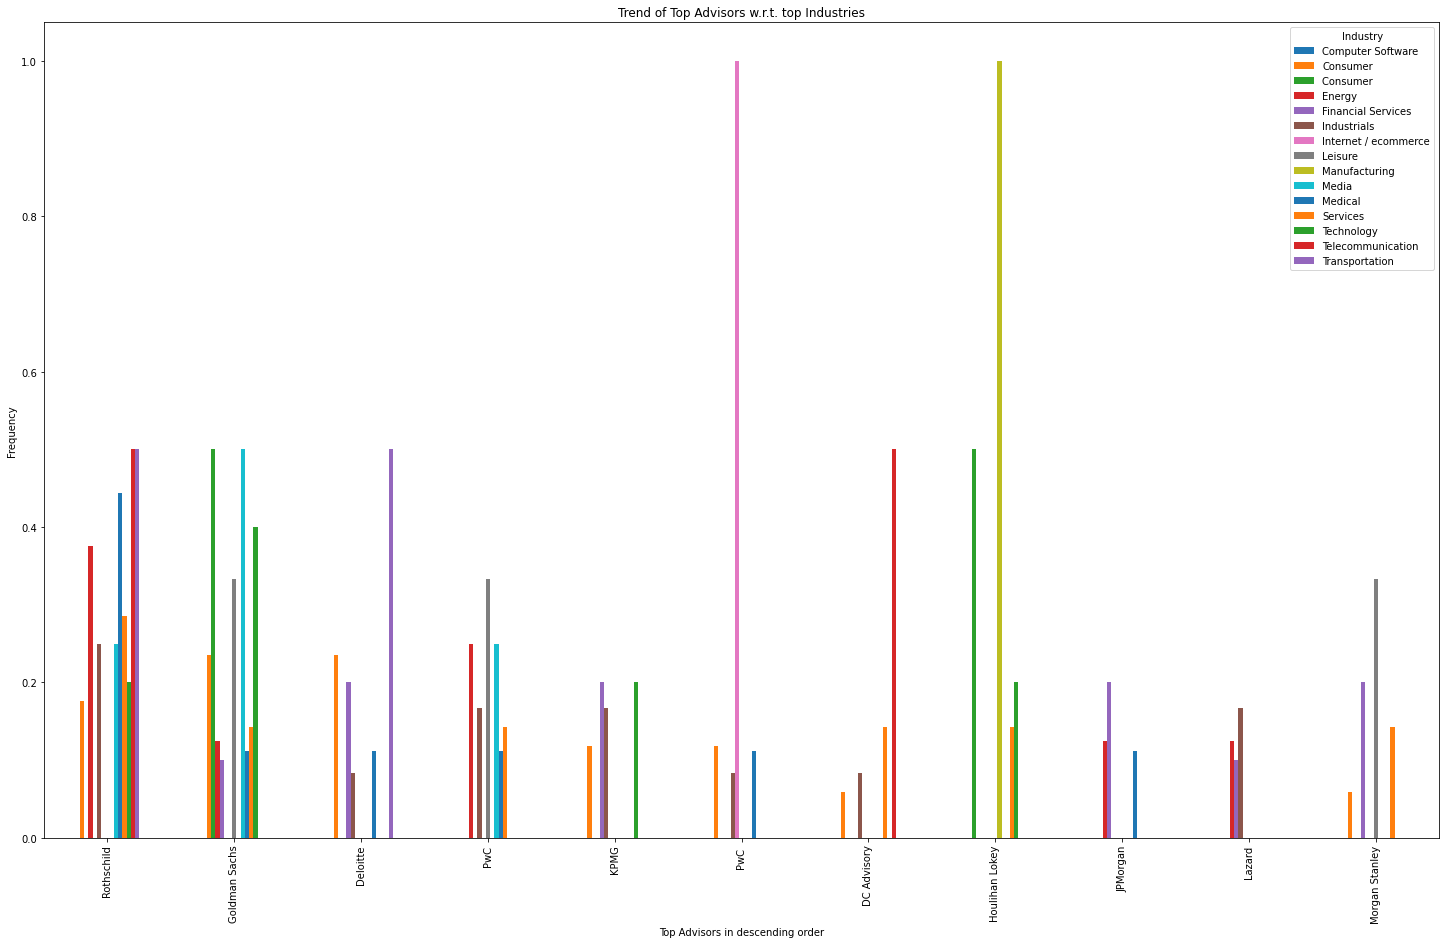

In [0]:
ind_adv.div(ind_adv.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. top Industries")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
targ_adv['Geography'].value_counts()

UK                    73
Italy                 67
France                42
Germany               31
Spain                 29
Netherlands           15
Poland                13
Switzerland            8
Sweden                 7
Ireland (Republic)     7
US                     5
Denmark                5
Norway                 4
Austria                3
Russia                 2
Finland                2
Belgium                2
Greece                 1
Estonia                1
Luxembourg             1
Croatia                1
Slovenia               1
Portugal               1
Name: Geography, dtype: int64

In [0]:
frequencies=targ_adv['Geography'].value_counts()
condition = frequencies<5   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_adv['Geography']= targ_adv['Geography'].replace(mask_dict)  # or you could make a copy not to modify original data

In [0]:
targ_adv['Geography'].value_counts(ascending=False)

UK                    73
Italy                 67
France                42
Germany               31
Spain                 29
miscellaneous         19
Netherlands           15
Poland                13
Switzerland            8
Ireland (Republic)     7
Sweden                 7
US                     5
Denmark                5
Name: Geography, dtype: int64

In [0]:
# we can see top geographical areas for advisors so lets see its trand w.r.t. advisors

In [0]:
geo_adv=pd.crosstab(targ_adv['Advisor'], targ_adv['Geography'],  margins=True, margins_name="Total")
geo_adv

Geography,Denmark,France,Germany,Ireland (Republic),Italy,Netherlands,Poland,Spain,Sweden,Switzerland,UK,US,miscellaneous,Total
Advisor,,,,,,,,,,,,,,
DC Advisory,0,1,1,0,1,0,0,0,0,0,2,0,0,5
Deloitte,0,0,0,0,0,0,2,2,0,1,4,0,0,9
Goldman Sachs,0,1,2,0,1,0,0,1,2,0,5,2,1,15
Houlihan Lokey,0,0,0,0,0,0,0,0,0,0,5,0,0,5
JPMorgan,0,0,0,0,0,0,1,2,0,0,2,0,0,5
KPMG,0,0,0,0,3,1,1,1,0,0,1,0,0,7
Lazard,0,2,1,0,1,0,0,1,0,0,0,0,0,5
Morgan Stanley,0,1,0,0,0,0,1,1,1,0,0,0,1,5
PwC,0,1,0,0,2,0,1,1,0,0,3,0,0,8


In [0]:
geo_adv.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_adv.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_adv.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
geo_adv

Geography,Denmark,France,Germany,Ireland (Republic),Italy,Netherlands,Poland,Spain,Sweden,Switzerland,UK,US
Advisor,,,,,,,,,,,,
Rothschild,0,3,0,0,3,1,1,1,0,3,7,0
Goldman Sachs,0,1,2,0,1,0,0,1,2,0,5,2
Deloitte,0,0,0,0,0,0,2,2,0,1,4,0
PwC,0,1,0,0,2,0,1,1,0,0,3,0
KPMG,0,0,0,0,3,1,1,1,0,0,1,0
PwC,1,0,0,1,1,0,0,1,0,0,2,0
DC Advisory,0,1,1,0,1,0,0,0,0,0,2,0
Houlihan Lokey,0,0,0,0,0,0,0,0,0,0,5,0
JPMorgan,0,0,0,0,0,0,1,2,0,0,2,0


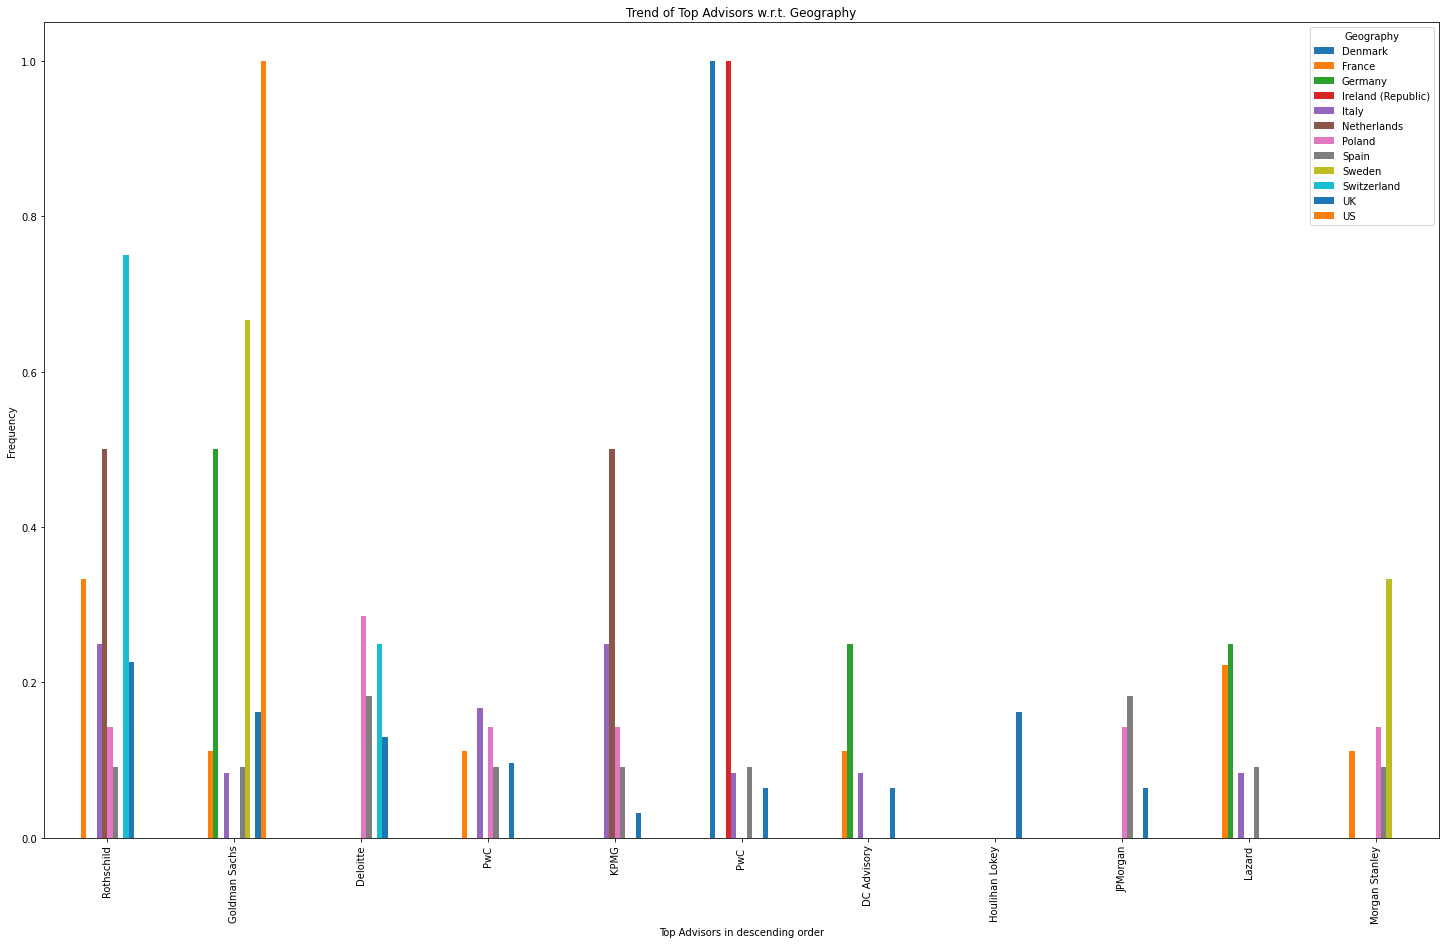

In [0]:
geo_adv.div(geo_adv.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Geography")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
# now lest analyse based on auction status
# 1. Target & Industry(based on all auction status)
# 2. Target & Geography(based on all auction status)

In [0]:
targ_adv['Auction status'].value_counts()

Live         118
Expected      71
Done          58
Paused        25
Cancelled     19
Current       15
Postponed     15
Name: Auction status, dtype: int64

In [0]:
# Now we will split data 7 sub parts based on above auction status. Then we will analyse and visualize Industry and geography based on Advisors

In [0]:
targ_adv_live = targ_adv[targ_adv['Auction status'] == 'Live']
targ_adv_live.shape

(118, 7)

In [0]:
targ_adv_exp = targ_adv[targ_adv['Auction status'] == 'Expected']
targ_adv_exp.shape

(71, 7)

In [0]:
targ_adv_done = targ_adv[targ_adv['Auction status'] == 'Done']
targ_adv_done.shape

(58, 7)

In [0]:
targ_adv_pause = targ_adv[targ_adv['Auction status'] == 'Paused']
targ_adv_pause.shape

(25, 7)

In [0]:
targ_adv_cancel = targ_adv[targ_adv['Auction status'] == 'Cancelled']
targ_adv_cancel.shape

(19, 7)

In [0]:
targ_adv_current = targ_adv[targ_adv['Auction status'] == 'Current']
targ_adv_current.shape

(15, 7)

In [0]:
targ_adv_post = targ_adv[targ_adv['Auction status'] == 'Postponed']
targ_adv_post.shape

(15, 7)

In [0]:
ind_live=pd.crosstab(targ_adv_live['Advisor'], targ_adv_live['Industry'], margins=True, margins_name="Total")
ind_live

Industry,Computer Software,Consumer,Consumer,Energy,Financial Services,Industrials,Leisure,Manufacturing,Media,Medical,Services,Technology,Telecommunication,miscellaneous,Total
Advisor,,,,,,,,,,,,,,,
DC Advisory,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2
Deloitte,0,3,0,0,1,0,0,0,0,0,0,0,0,0,4
Goldman Sachs,0,2,1,0,1,0,0,0,1,0,0,0,0,0,5
Houlihan Lokey,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
KPMG,0,1,0,0,1,2,0,0,0,0,0,0,0,0,4
Lazard,0,0,0,1,1,2,0,0,0,0,0,0,0,0,4
Morgan Stanley,0,0,0,0,1,0,1,0,0,0,1,0,0,0,3
PwC,0,0,0,2,0,1,1,0,0,1,0,0,0,0,5
PwC,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2


In [0]:
ind_live.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_live.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_live.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_live

Industry,Computer Software,Consumer,Consumer,Energy,Financial Services,Industrials,Leisure,Manufacturing,Media,Medical,Services,Technology,Telecommunication
Advisor,,,,,,,,,,,,,
Rothschild,0,0,0,2,0,0,0,0,0,3,0,0,1
Goldman Sachs,0,2,1,0,1,0,0,0,1,0,0,0,0
PwC,0,0,0,2,0,1,1,0,0,1,0,0,0
Deloitte,0,3,0,0,1,0,0,0,0,0,0,0,0
KPMG,0,1,0,0,1,2,0,0,0,0,0,0,0
Lazard,0,0,0,1,1,2,0,0,0,0,0,0,0
Morgan Stanley,0,0,0,0,1,0,1,0,0,0,1,0,0
DC Advisory,0,1,0,0,0,0,0,0,0,0,1,0,0
PwC,0,0,0,0,0,0,0,0,0,1,0,0,0


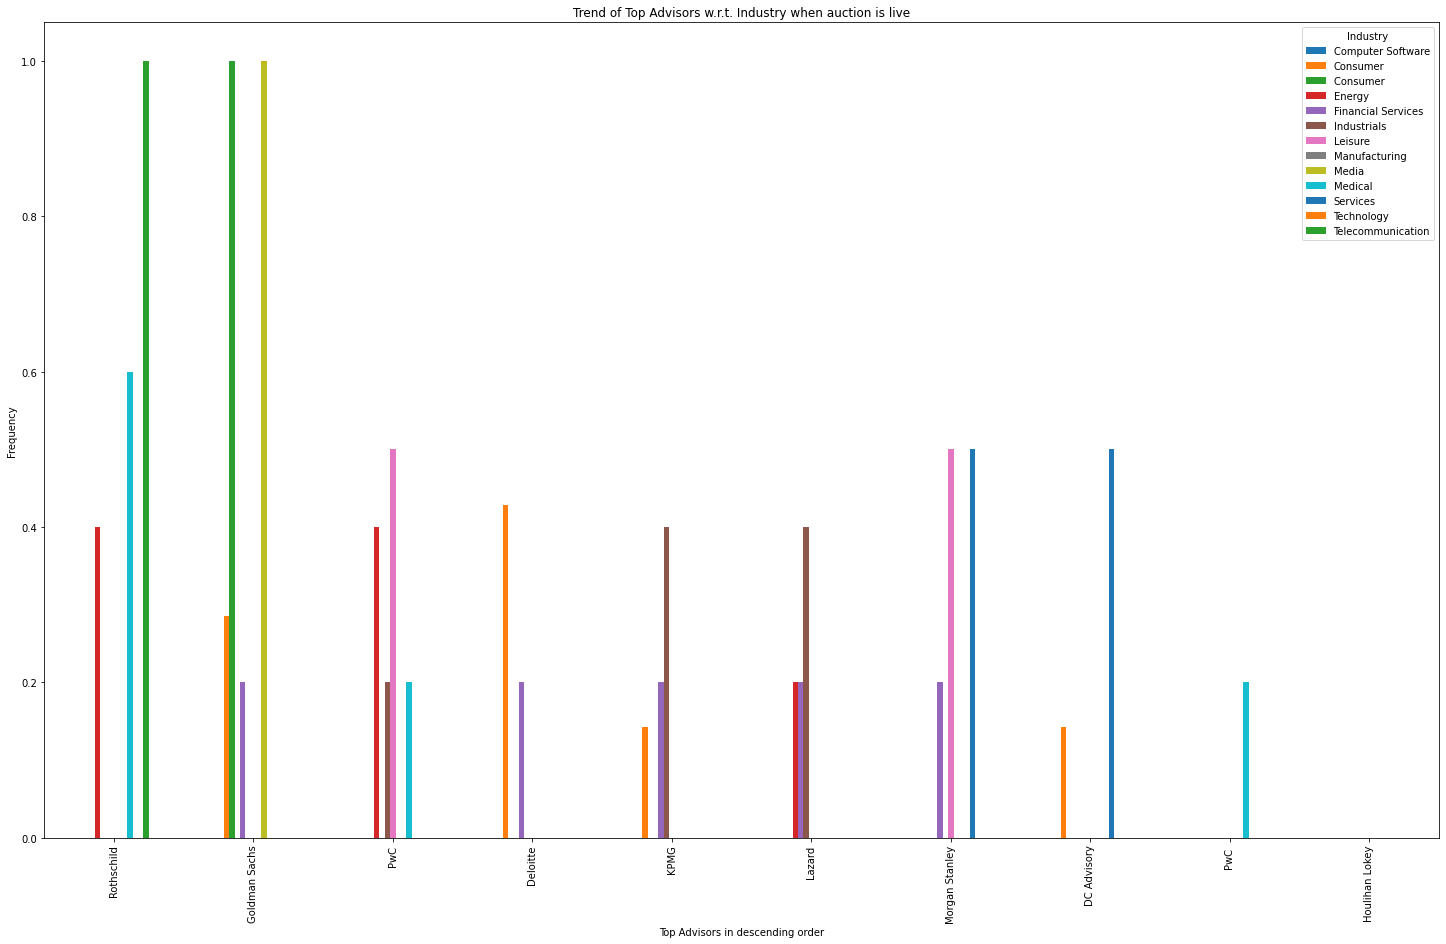

In [0]:
ind_live.div(ind_live.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is live")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_expect=pd.crosstab(targ_adv_exp['Advisor'], targ_adv_exp['Industry'], margins=True, margins_name="Total")
ind_expect

Industry,Computer Software,Consumer,Consumer,Energy,Financial Services,Industrials,Leisure,Manufacturing,Media,Medical,Services,Technology,Telecommunication,Transportation,miscellaneous,Total
Advisor,,,,,,,,,,,,,,,,
DC Advisory,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2
Deloitte,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2
Goldman Sachs,0,2,0,1,0,0,1,0,0,0,0,0,0,0,1,5
Houlihan Lokey,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,3
JPMorgan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
KPMG,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Lazard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
PwC,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
PwC,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [0]:
ind_expect.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_expect.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_expect.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_expect

Industry,Computer Software,Consumer,Consumer,Energy,Financial Services,Industrials,Leisure,Manufacturing,Media,Medical,Services,Technology,Telecommunication,Transportation
Advisor,,,,,,,,,,,,,,
Rothschild,0,1,0,0,0,3,0,0,0,0,1,0,0,1
Goldman Sachs,0,2,0,1,0,0,1,0,0,0,0,0,0,0
Houlihan Lokey,0,0,0,0,0,0,0,1,0,0,1,1,0,0
DC Advisory,0,0,0,0,0,1,0,0,0,0,0,0,1,0
Deloitte,0,0,0,0,0,1,0,0,0,1,0,0,0,0
JPMorgan,0,0,0,0,0,0,0,0,0,1,0,0,0,0
PwC,0,1,0,0,0,1,0,0,0,0,0,0,0,0
KPMG,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Lazard,0,0,0,0,0,0,0,0,0,0,0,0,0,0


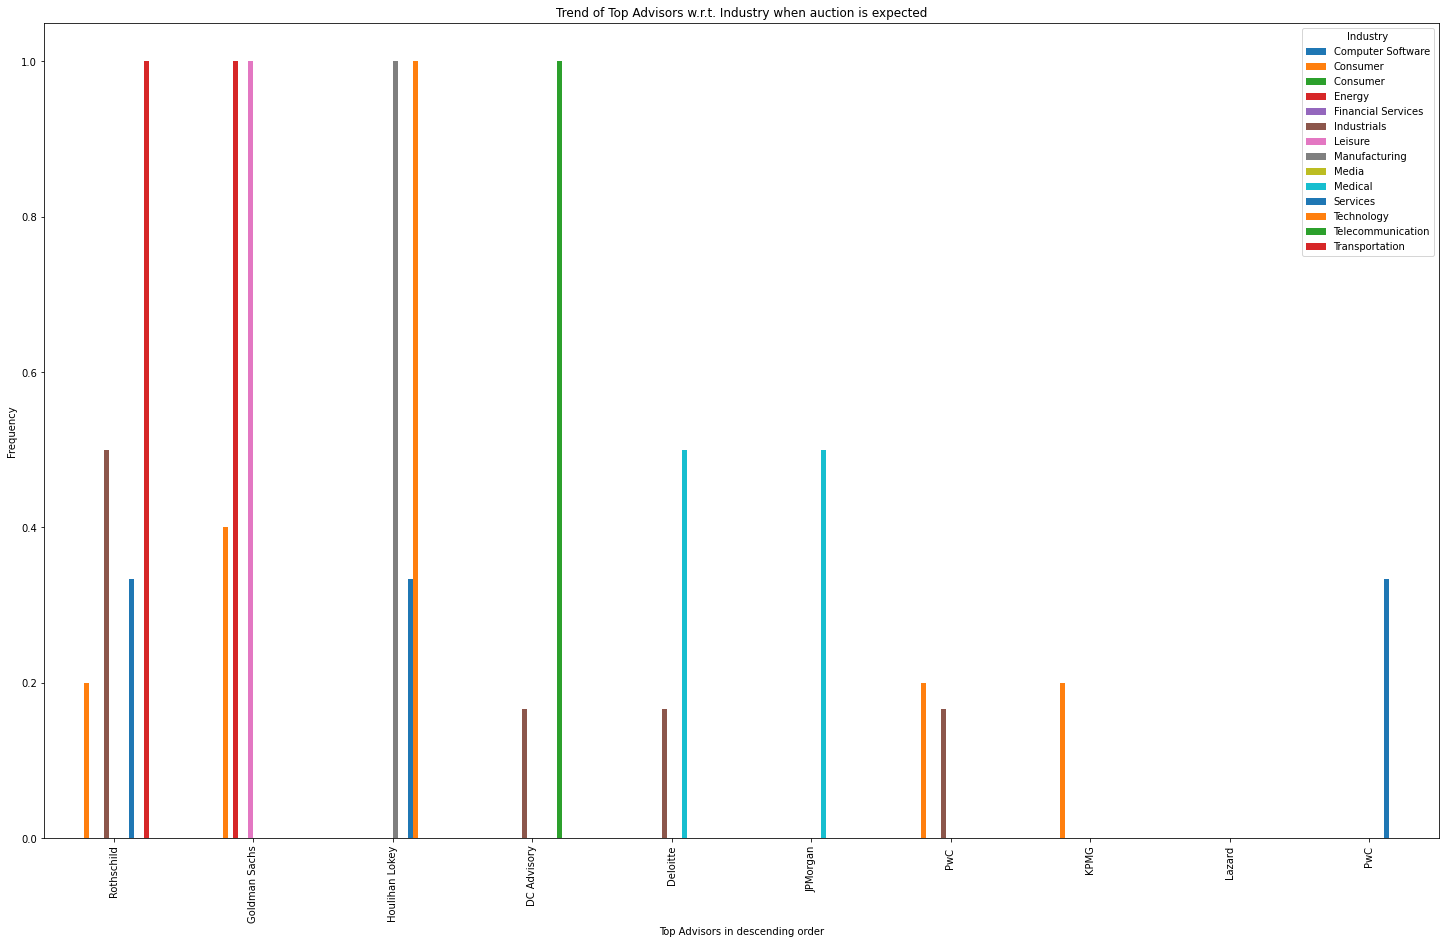

In [0]:
ind_expect.div(ind_expect.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is expected")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_done=pd.crosstab(targ_adv_done['Advisor'], targ_adv_done['Industry'], margins=True, margins_name="Total")
ind_done

Industry,Consumer,Consumer,Energy,Financial Services,Industrials,Media,Medical,Services,Technology,Transportation,miscellaneous,Total
Advisor,,,,,,,,,,,,
Deloitte,1,0,0,1,0,0,0,0,0,0,0,2
Goldman Sachs,0,0,0,0,0,0,0,1,0,0,0,1
Houlihan Lokey,0,1,0,0,0,0,0,0,0,0,0,1
JPMorgan,0,0,1,1,0,0,0,0,0,0,0,2
KPMG,0,0,0,1,0,0,0,0,1,0,0,2
Morgan Stanley,0,0,0,1,0,0,0,0,0,0,0,1
PwC,0,0,0,0,0,1,0,0,0,0,0,1
Rothschild,0,0,0,0,0,1,0,1,1,0,0,3
miscellaneous,3,0,5,5,3,3,2,4,7,6,7,45


In [0]:
ind_done.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_done.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_done.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_done

Industry,Consumer,Consumer,Energy,Financial Services,Industrials,Media,Medical,Services,Technology,Transportation
Advisor,,,,,,,,,,
Rothschild,0,0,0,0,0,1,0,1,1,0
Deloitte,1,0,0,1,0,0,0,0,0,0
JPMorgan,0,0,1,1,0,0,0,0,0,0
KPMG,0,0,0,1,0,0,0,0,1,0
Goldman Sachs,0,0,0,0,0,0,0,1,0,0
Houlihan Lokey,0,1,0,0,0,0,0,0,0,0
Morgan Stanley,0,0,0,1,0,0,0,0,0,0
PwC,0,0,0,0,0,1,0,0,0,0


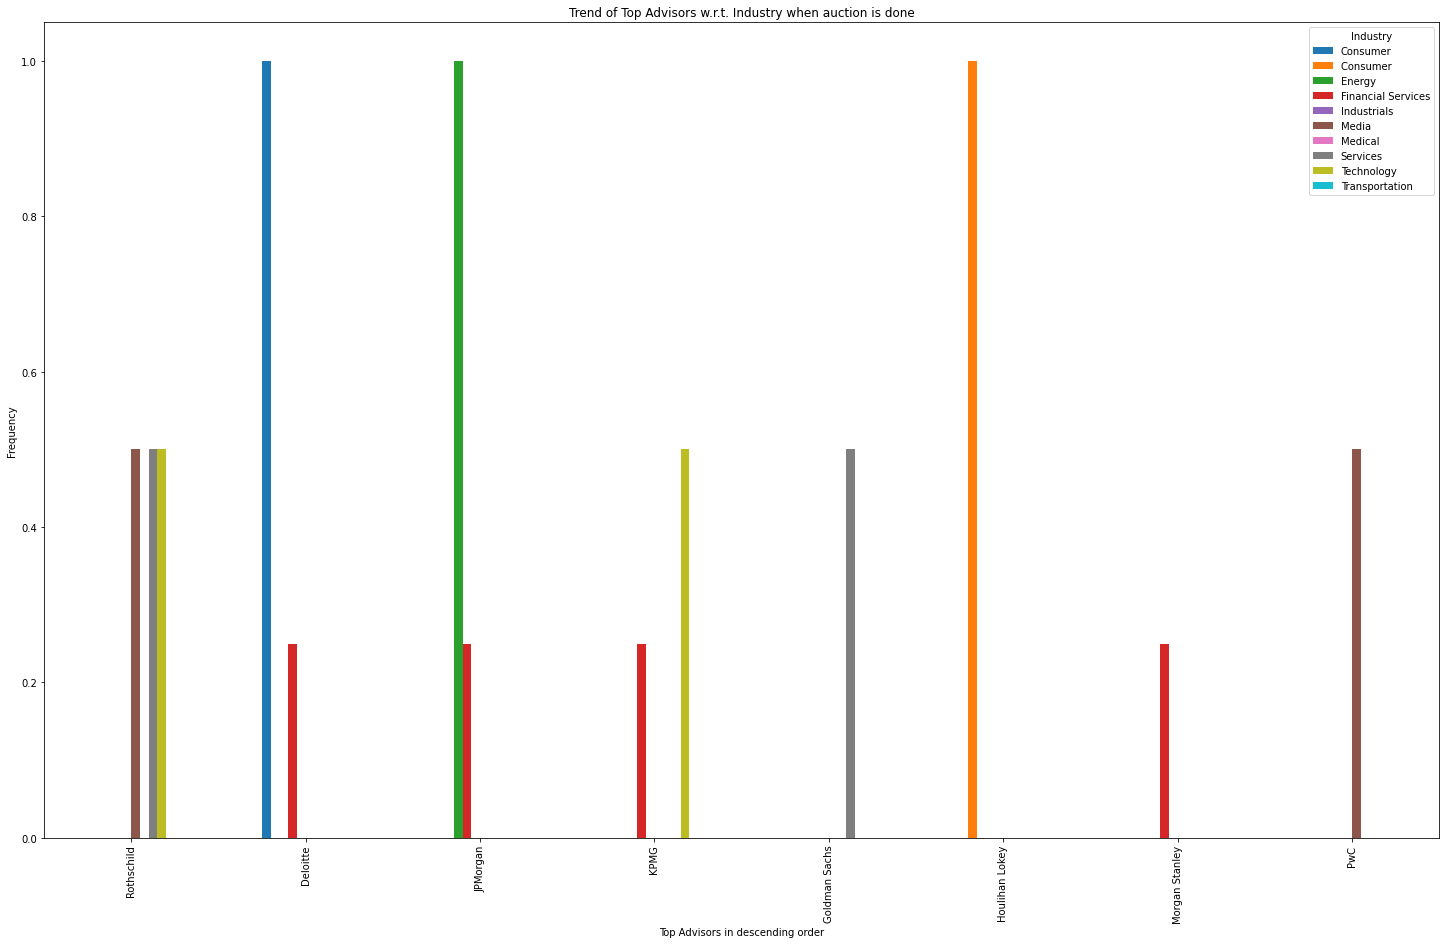

In [0]:
ind_done.div(ind_done.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is done")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_pause=pd.crosstab(targ_adv_pause['Advisor'], targ_adv_pause['Industry'], margins=True, margins_name="Total")
ind_pause

Industry,Consumer,Financial Services,Industrials,Media,Medical,Services,Technology,Telecommunication,miscellaneous,Total
Advisor,,,,,,,,,,
DC Advisory,0,0,0,0,0,0,0,0,1,1
Morgan Stanley,1,0,0,0,0,0,0,0,0,1
PwC,0,0,1,0,0,0,0,0,0,1
PwC,1,0,0,0,0,0,0,0,0,1
Rothschild,1,0,0,0,1,0,0,0,0,2
miscellaneous,7,1,2,1,1,1,3,1,2,19
Total,10,1,3,1,2,1,3,1,3,25


In [0]:
ind_pause.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_pause.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_pause.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_pause

Industry,Consumer,Financial Services,Industrials,Media,Medical,Services,Technology,Telecommunication
Advisor,,,,,,,,
Rothschild,1,0,0,0,1,0,0,0
DC Advisory,0,0,0,0,0,0,0,0
Morgan Stanley,1,0,0,0,0,0,0,0
PwC,0,0,1,0,0,0,0,0
PwC,1,0,0,0,0,0,0,0


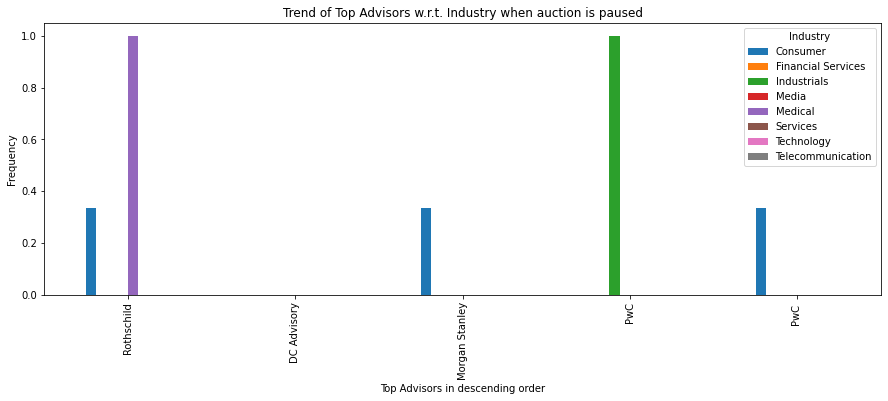

In [0]:
ind_pause.div(ind_pause.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is paused")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_cancel=pd.crosstab(targ_adv_cancel['Advisor'], targ_adv_cancel['Industry'], margins=True, margins_name="Total")
ind_cancel

Industry,Computer Software,Consumer,Energy,Financial Services,Leisure,Media,Technology,miscellaneous,Total
Advisor,,,,,,,,,
Goldman Sachs,0,0,0,0,0,1,1,0,2
JPMorgan,0,0,0,1,0,0,0,0,1
Rothschild,0,0,1,0,0,0,0,0,1
miscellaneous,2,4,1,0,3,0,2,3,15
Total,2,4,2,1,3,1,3,3,19


In [0]:
ind_cancel.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_cancel.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_cancel.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_cancel

Industry,Computer Software,Consumer,Energy,Financial Services,Leisure,Media,Technology
Advisor,,,,,,,
Goldman Sachs,0,0,0,0,0,1,1
JPMorgan,0,0,0,1,0,0,0
Rothschild,0,0,1,0,0,0,0


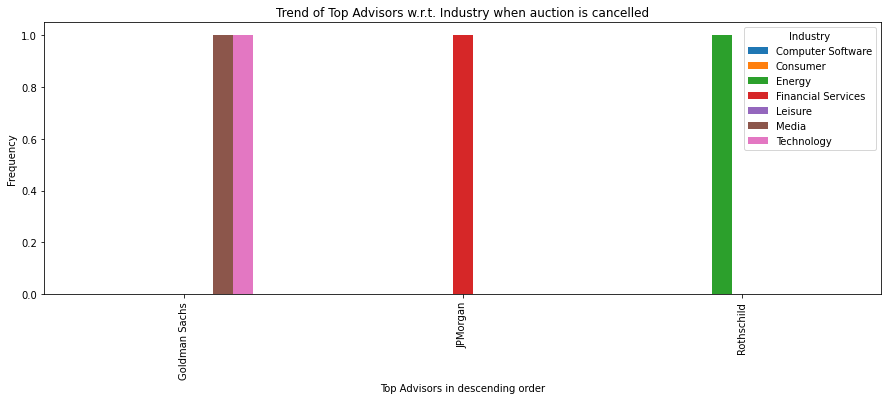

In [0]:
ind_cancel.div(ind_cancel.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is cancelled")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_current=pd.crosstab(targ_adv_current['Advisor'], targ_adv_current['Industry'], margins=True, margins_name="Total")
ind_current

Industry,Financial Services,Internet / ecommerce,Medical,Services,Transportation,Total
Advisor,,,,,,
Deloitte,0,0,0,0,1,1
PwC,0,1,0,0,0,1
miscellaneous,2,5,4,1,1,13
Total,2,6,4,1,2,15


In [0]:
ind_current.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_current.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_current

Industry,Financial Services,Internet / ecommerce,Medical,Services,Transportation,Total
Advisor,,,,,,
Deloitte,0,0,0,0,1,1
PwC,0,1,0,0,0,1


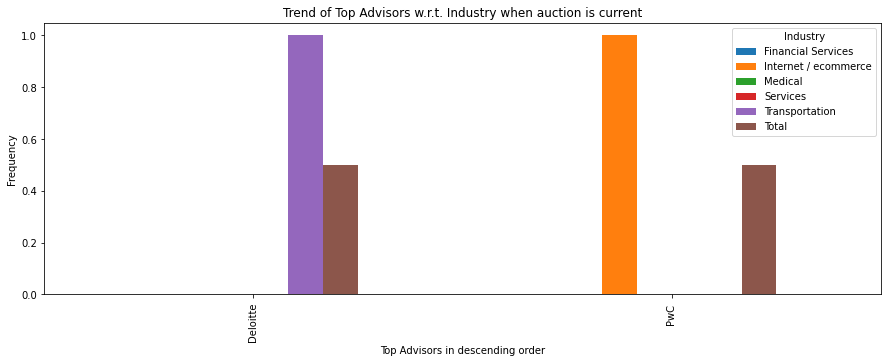

In [0]:
ind_current.div(ind_current.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is current")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_post=pd.crosstab(targ_adv_post['Advisor'], targ_adv_post['Industry'], margins=True, margins_name="Total")
ind_post

Industry,Consumer,Energy,Leisure,Medical,Services,Technology,miscellaneous,Total
Advisor,,,,,,,,
Goldman Sachs,0,0,0,1,0,1,0,2
Rothschild,1,0,0,0,0,0,0,1
miscellaneous,0,1,1,6,1,0,3,12
Total,1,1,1,7,1,1,3,15


In [0]:
ind_post.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_post.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_post.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_post

Industry,Consumer,Energy,Leisure,Medical,Services,Technology
Advisor,,,,,,
Goldman Sachs,0,0,0,1,0,1
Rothschild,1,0,0,0,0,0


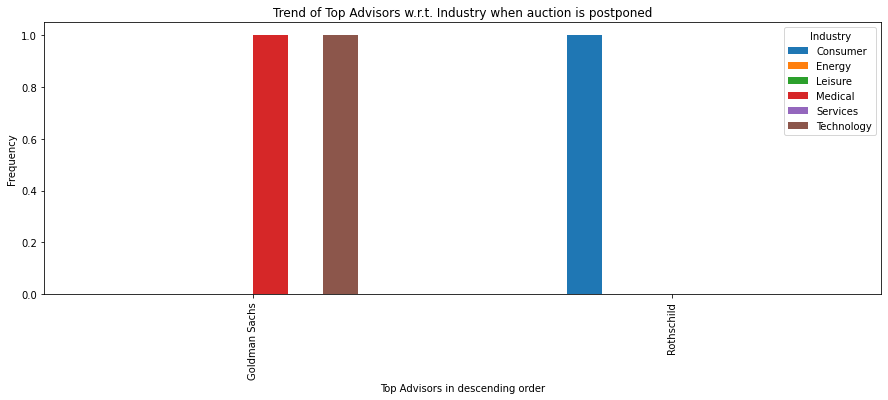

In [0]:
ind_post.div(ind_post.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Industry when auction is postponed")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_live2=pd.crosstab(targ_adv_live['Advisor'], targ_adv_live['Geography'], margins=True, margins_name="Total")
ind_live2

Geography,Denmark,France,Germany,Italy,Netherlands,Poland,Spain,Sweden,Switzerland,UK,US,miscellaneous,Total
Advisor,,,,,,,,,,,,,
DC Advisory,0,0,0,1,0,0,0,0,0,1,0,0,2
Deloitte,0,0,0,0,0,0,1,0,1,2,0,0,4
Goldman Sachs,0,0,0,1,0,0,0,0,0,2,1,1,5
Houlihan Lokey,0,0,0,0,0,0,0,0,0,1,0,0,1
KPMG,0,0,0,1,1,1,1,0,0,0,0,0,4
Lazard,0,1,1,1,0,0,1,0,0,0,0,0,4
Morgan Stanley,0,1,0,0,0,0,0,1,0,0,0,1,3
PwC,0,1,0,2,0,1,1,0,0,0,0,0,5
PwC,1,0,0,1,0,0,0,0,0,0,0,0,2


In [0]:
ind_live2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_live2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_live2.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_live2

Geography,Denmark,France,Germany,Italy,Netherlands,Poland,Spain,Sweden,Switzerland,UK,US
Advisor,,,,,,,,,,,
Rothschild,0,0,0,2,1,0,1,0,1,1,0
Goldman Sachs,0,0,0,1,0,0,0,0,0,2,1
PwC,0,1,0,2,0,1,1,0,0,0,0
Deloitte,0,0,0,0,0,0,1,0,1,2,0
KPMG,0,0,0,1,1,1,1,0,0,0,0
Lazard,0,1,1,1,0,0,1,0,0,0,0
Morgan Stanley,0,1,0,0,0,0,0,1,0,0,0
DC Advisory,0,0,0,1,0,0,0,0,0,1,0
PwC,1,0,0,1,0,0,0,0,0,0,0


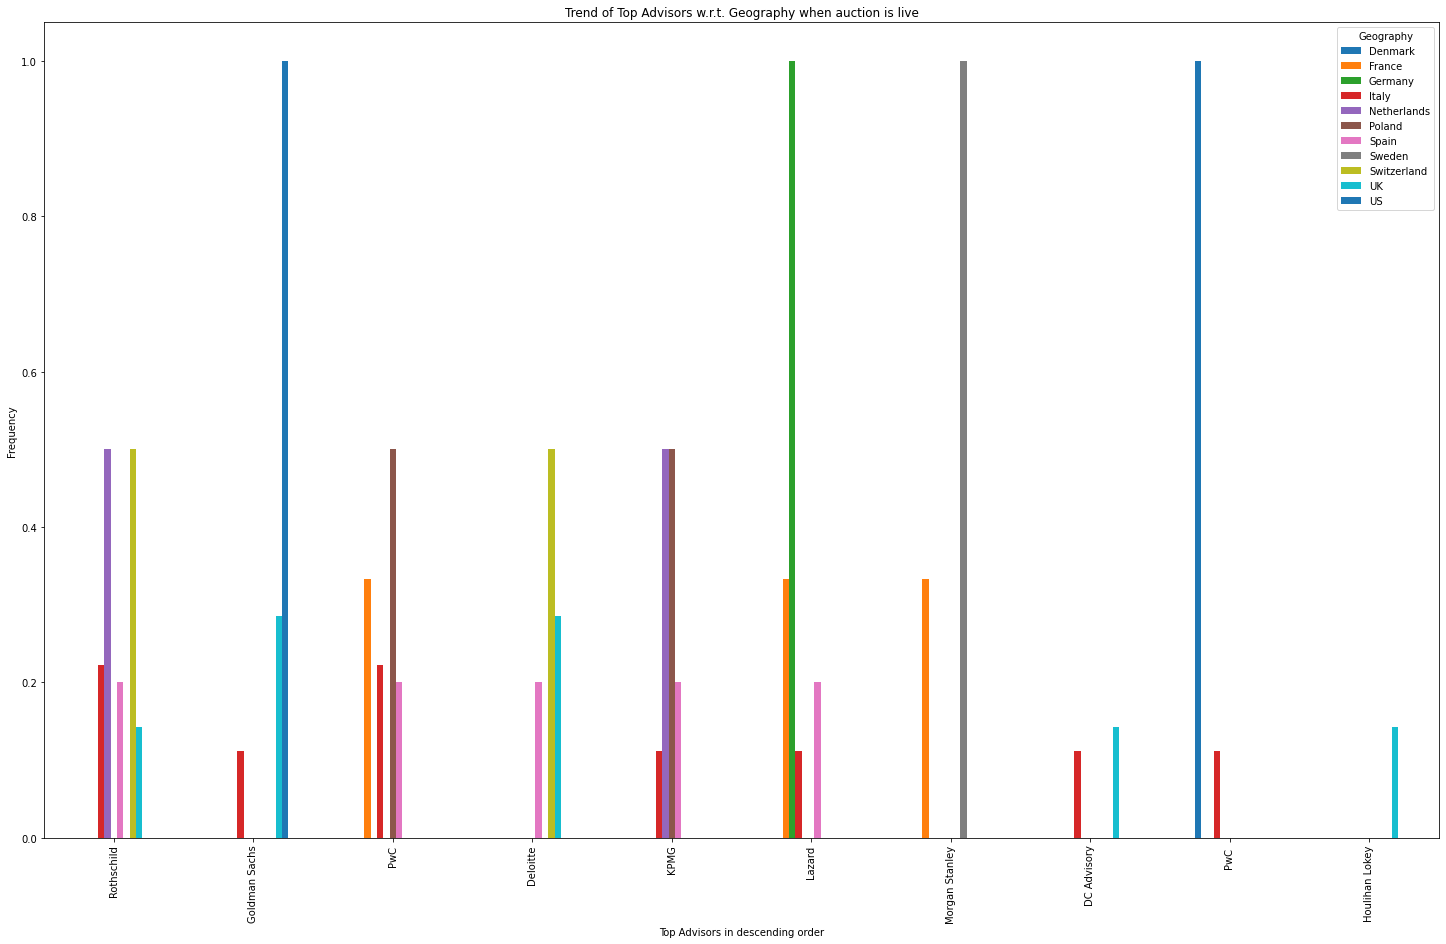

In [0]:
ind_live2.div(ind_live2.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is live")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_expect2=pd.crosstab(targ_adv_exp['Advisor'], targ_adv_exp['Geography'], margins=True, margins_name="Total")
ind_expect2

Geography,France,Germany,Ireland (Republic),Italy,Netherlands,Poland,Spain,Sweden,Switzerland,UK,miscellaneous,Total
Advisor,,,,,,,,,,,,
DC Advisory,1,1,0,0,0,0,0,0,0,0,0,2
Deloitte,0,0,0,0,0,1,1,0,0,0,0,2
Goldman Sachs,0,2,0,0,0,0,1,0,0,2,0,5
Houlihan Lokey,0,0,0,0,0,0,0,0,0,3,0,3
JPMorgan,0,0,0,0,0,0,1,0,0,1,0,2
KPMG,0,0,0,0,0,0,0,0,0,1,0,1
Lazard,1,0,0,0,0,0,0,0,0,0,0,1
PwC,0,0,0,0,0,0,0,0,0,1,0,1
PwC,0,0,0,0,0,0,0,0,0,2,0,2


In [0]:
ind_expect2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_expect2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_expect2.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_expect2

Geography,France,Germany,Ireland (Republic),Italy,Netherlands,Poland,Spain,Sweden,Switzerland,UK
Advisor,,,,,,,,,,
Rothschild,0,0,0,1,0,1,0,0,2,2
Goldman Sachs,0,2,0,0,0,0,1,0,0,2
Houlihan Lokey,0,0,0,0,0,0,0,0,0,3
DC Advisory,1,1,0,0,0,0,0,0,0,0
Deloitte,0,0,0,0,0,1,1,0,0,0
JPMorgan,0,0,0,0,0,0,1,0,0,1
PwC,0,0,0,0,0,0,0,0,0,2
KPMG,0,0,0,0,0,0,0,0,0,1
Lazard,1,0,0,0,0,0,0,0,0,0


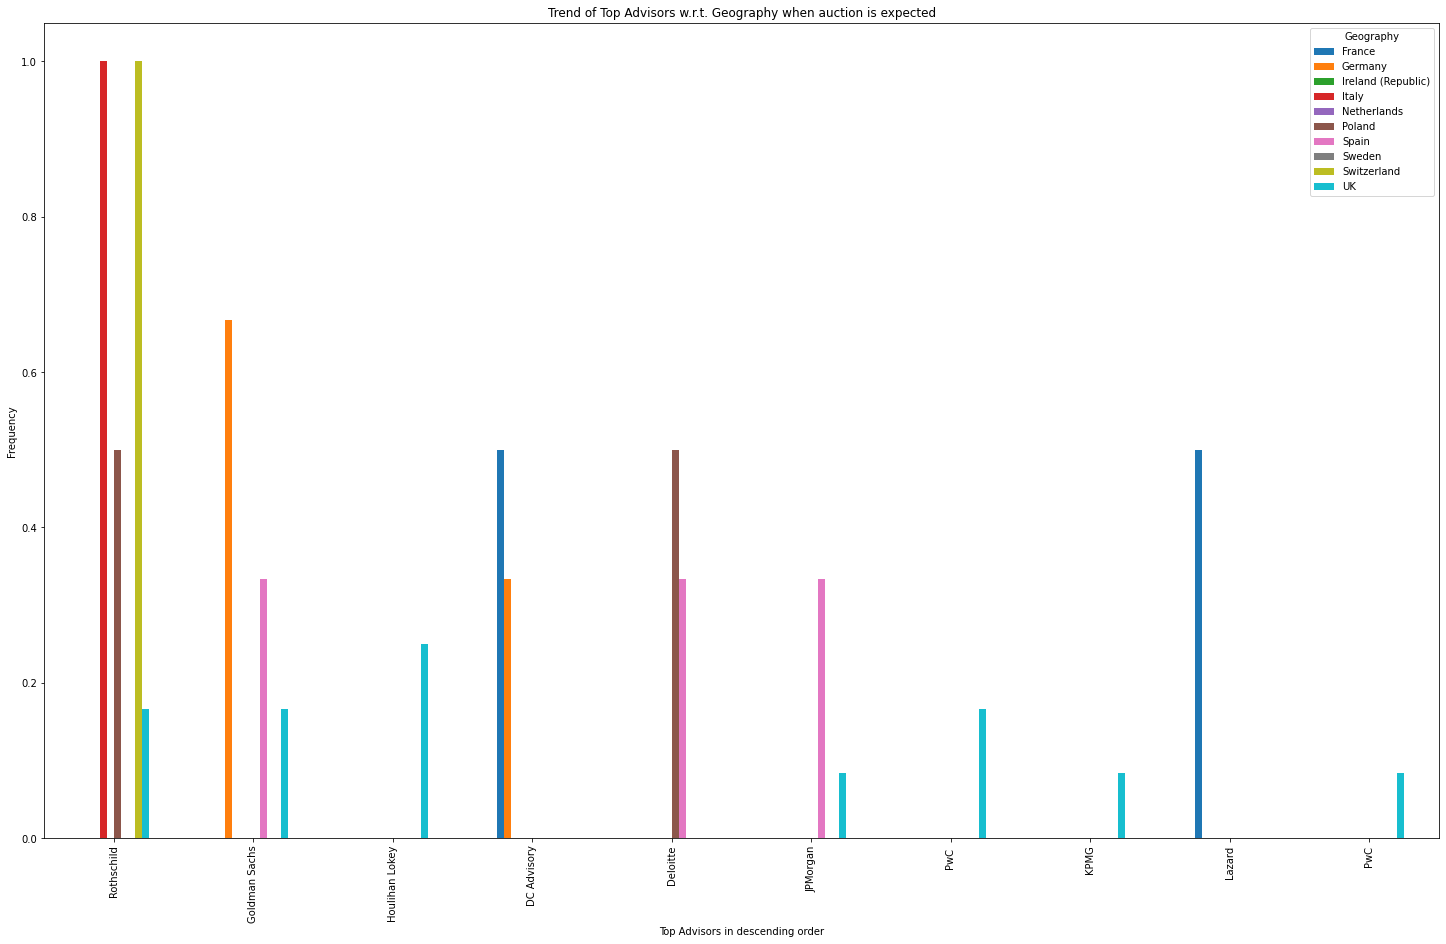

In [0]:
ind_expect2.div(ind_expect2.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is expected")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_done2=pd.crosstab(targ_adv_done['Advisor'], targ_adv_done['Geography'], margins=True, margins_name="Total")
ind_done2

Geography,Denmark,France,Germany,Italy,Netherlands,Poland,Spain,UK,Total
Advisor,,,,,,,,,
Deloitte,0,0,0,0,0,1,0,1,2
Goldman Sachs,0,1,0,0,0,0,0,0,1
Houlihan Lokey,0,0,0,0,0,0,0,1,1
JPMorgan,0,0,0,0,0,0,1,1,2
KPMG,0,0,0,2,0,0,0,0,2
Morgan Stanley,0,0,0,0,0,1,0,0,1
PwC,0,0,0,0,0,0,0,1,1
Rothschild,0,2,0,0,0,0,0,1,3
miscellaneous,1,12,11,10,1,2,1,7,45


In [0]:
ind_done2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_done2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_done2

Geography,Denmark,France,Germany,Italy,Netherlands,Poland,Spain,UK,Total
Advisor,,,,,,,,,
Rothschild,0,2,0,0,0,0,0,1,3
Deloitte,0,0,0,0,0,1,0,1,2
JPMorgan,0,0,0,0,0,0,1,1,2
KPMG,0,0,0,2,0,0,0,0,2
Goldman Sachs,0,1,0,0,0,0,0,0,1
Houlihan Lokey,0,0,0,0,0,0,0,1,1
Morgan Stanley,0,0,0,0,0,1,0,0,1
PwC,0,0,0,0,0,0,0,1,1


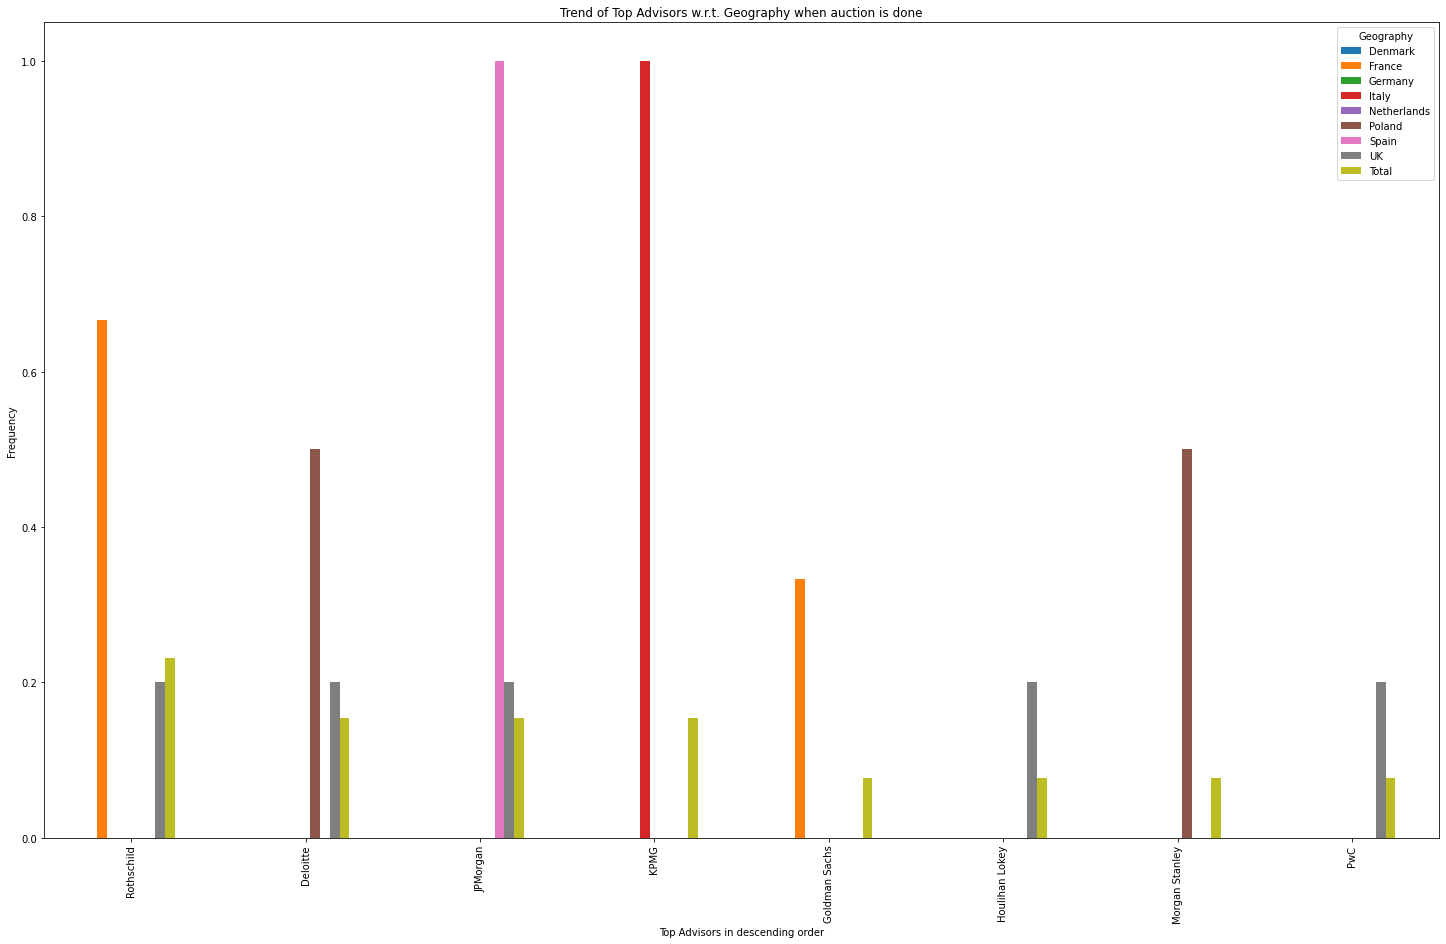

In [0]:
ind_done2.div(ind_done2.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is done")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_pause2=pd.crosstab(targ_adv_pause['Advisor'], targ_adv_pause['Geography'], margins=True, margins_name="Total")
ind_pause2

Geography,Denmark,France,Germany,Italy,Netherlands,Spain,Switzerland,UK,miscellaneous,Total
Advisor,,,,,,,,,,
DC Advisory,0,0,0,0,0,0,0,1,0,1
Morgan Stanley,0,0,0,0,0,1,0,0,0,1
PwC,0,0,0,0,0,0,0,1,0,1
PwC,0,0,0,0,0,1,0,0,0,1
Rothschild,0,1,0,0,0,0,0,1,0,2
miscellaneous,1,1,2,1,3,6,2,2,1,19
Total,1,2,2,1,3,8,2,5,1,25


In [0]:
ind_pause2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_pause2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_pause2.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_pause2

Geography,Denmark,France,Germany,Italy,Netherlands,Spain,Switzerland,UK
Advisor,,,,,,,,
Rothschild,0,1,0,0,0,0,0,1
DC Advisory,0,0,0,0,0,0,0,1
Morgan Stanley,0,0,0,0,0,1,0,0
PwC,0,0,0,0,0,0,0,1
PwC,0,0,0,0,0,1,0,0


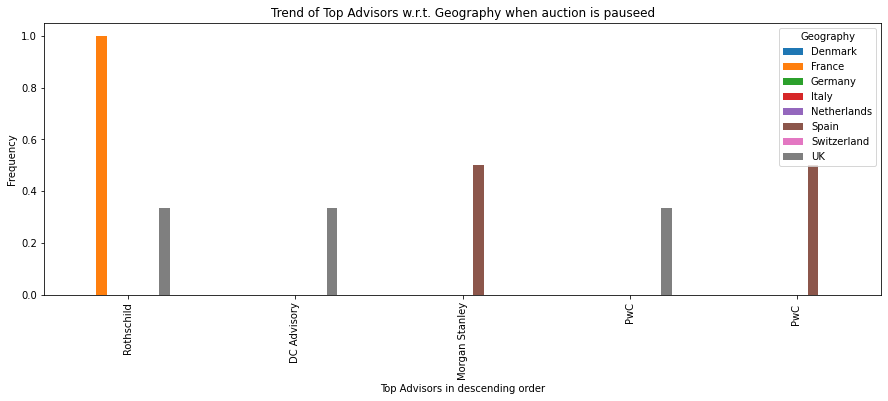

In [0]:
ind_pause2.div(ind_pause2.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is pauseed")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_cancel2=pd.crosstab(targ_adv_cancel['Advisor'], targ_adv_cancel['Geography'], margins=True, margins_name="Total")
ind_cancel2

Geography,Germany,Italy,Netherlands,Poland,Spain,Sweden,UK,Total
Advisor,,,,,,,,
Goldman Sachs,0,0,0,0,0,1,1,2
JPMorgan,0,0,0,1,0,0,0,1
Rothschild,0,0,0,0,0,0,1,1
miscellaneous,2,2,1,2,2,1,5,15
Total,2,2,1,3,2,2,7,19


In [0]:
ind_cancel2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_cancel2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_cancel2

Geography,Germany,Italy,Netherlands,Poland,Spain,Sweden,UK,Total
Advisor,,,,,,,,
Goldman Sachs,0,0,0,0,0,1,1,2
JPMorgan,0,0,0,1,0,0,0,1
Rothschild,0,0,0,0,0,0,1,1


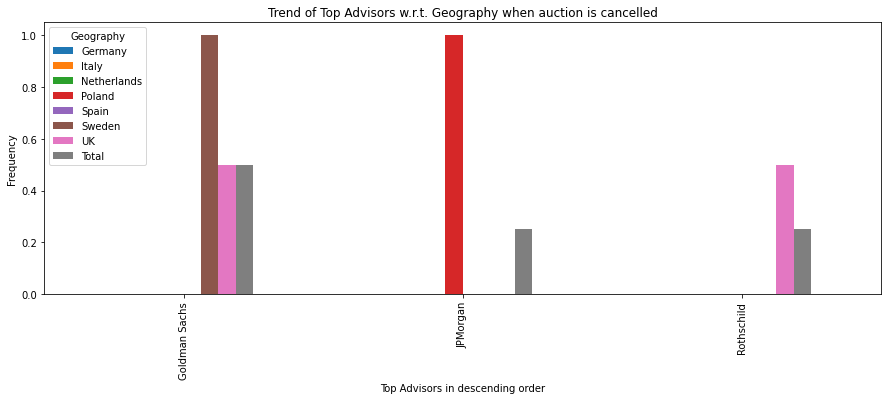

In [0]:
ind_cancel2.div(ind_cancel2.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is cancelled")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_current2=pd.crosstab(targ_adv_current['Advisor'], targ_adv_current['Geography'], margins=True, margins_name="Total")
ind_current2

Geography,France,Ireland (Republic),Netherlands,UK,miscellaneous,Total
Advisor,,,,,,
Deloitte,0,0,0,1,0,1
PwC,0,1,0,0,0,1
miscellaneous,4,5,2,1,1,13
Total,4,6,2,2,1,15


In [0]:
ind_current2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_current2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_current2.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_current2

Geography,France,Ireland (Republic),Netherlands,UK
Advisor,,,,
Deloitte,0,0,0,1
PwC,0,1,0,0


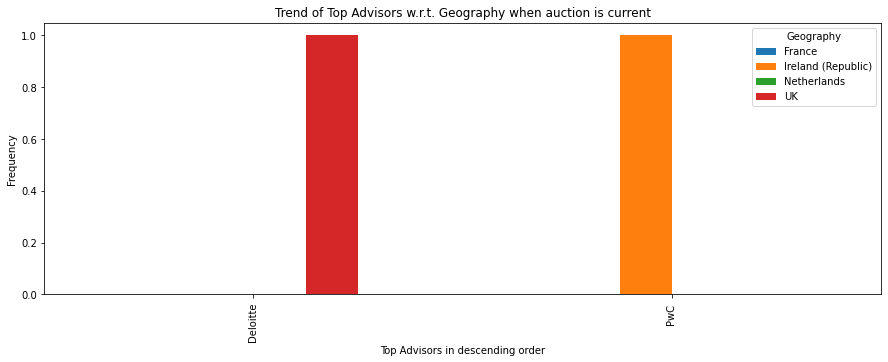

In [0]:
ind_current2.div(ind_current2.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is current")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_post2=pd.crosstab(targ_adv_post['Advisor'], targ_adv_post['Geography'], margins=True, margins_name="Total")
ind_post2

Geography,France,Netherlands,Spain,Sweden,UK,US,miscellaneous,Total
Advisor,,,,,,,,
Goldman Sachs,0,0,0,1,0,1,0,2
Rothschild,0,0,0,0,1,0,0,1
miscellaneous,2,3,2,0,1,2,2,12
Total,2,3,2,1,2,3,2,15


In [0]:
ind_post2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_post2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_post2.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_post2

Geography,France,Netherlands,Spain,Sweden,UK,US
Advisor,,,,,,
Goldman Sachs,0,0,0,1,0,1
Rothschild,0,0,0,0,1,0


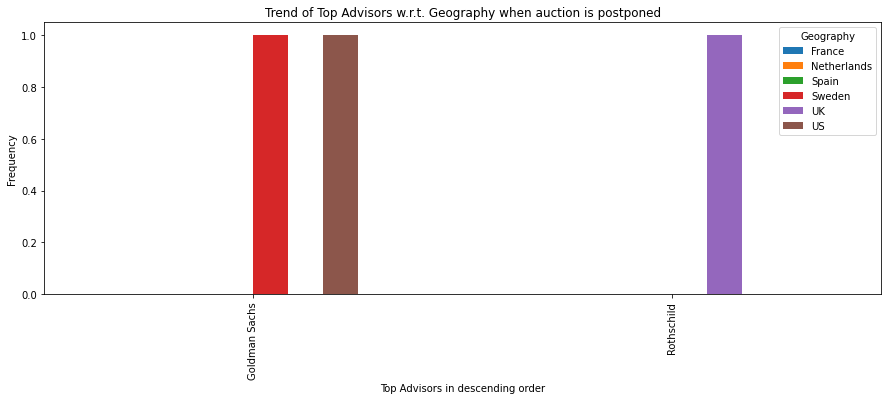

In [0]:
ind_post2.div(ind_post2.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Advisors w.r.t. Geography when auction is postponed")
plt.xlabel("Top Advisors in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
targ_bid = pd.read_excel(excel_file, sheet_name=4)

In [0]:
targ_bid.head()

,Target,company description,Industry,Geography,Bidder,Status (current/dropped out),Round,Bidder FA,Bidder LA,Reason,Auction Status
0,Adelie Foods,Restaurant chain,Consumer,UK,Greencore,Current,2,NaN,NaN,NaN,Live
1,Adelie Foods,Restaurant chain,Consumer,UK,Bakkavor,Current,2,NaN,NaN,NaN,Live
2,AS Monaco,Football club,Leisure,Monaco,CVC Capital,Current,1,NaN,NaN,NaN,Live
3,Athens International Airport,Airport,Transport,Greece,ADP Groupe,Current,2,NaN,NaN,NaN,Cancelled
4,Athens International Airport,Airport,Transport,Greece,AVIALLIANCE,Current,2,NaN,NaN,NaN,Cancelled


In [0]:
targ_bid.columns # columns in bidder advisor data

Index(['Target', 'company description', 'Industry', 'Geography', 'Bidder',
       'Status (current/dropped out)', 'Round', 'Bidder FA', 'Bidder LA',
       'Reason', 'Auction Status'],
      dtype='object')

In [0]:
targ_bid.shape  # bidder advisor data shape

(1083, 11)

In [0]:
targ_bid.describe()  # bidder advisor description statistically

,Target,company description,Industry,Geography,Bidder,Status (current/dropped out),Round,Bidder FA,Bidder LA,Reason,Auction Status
count,1076,1069,1069,1069,1071,1062,442,61,29,6,1083
unique,266,244,56,30,751,9,5,56,29,5,8
top,Egnatia,toll-road operator,Medical,UK,CVC,Potential,1,Goldman Sachs,Houthoff,price expectation mismatch,Live
freq,22,34,136,226,20,487,199,4,1,2,313


In [0]:
targ_bid.isnull().sum()  # finding missing or null values in data

Target                             7
company description               14
Industry                          14
Geography                         14
Bidder                            12
Status (current/dropped out)      21
Round                            641
Bidder FA                       1022
Bidder LA                       1054
Reason                          1077
Auction Status                     0
dtype: int64

In [0]:
# From above description we can say as below:
# 1. Bidder FA, Bidder LA, Reason columns have no use which has maximum null or blank values, so we can remove that from our dataset
# 2. Three columns (company description, Industry, Geography) have only 1 missing value and we treat them either by removing or by replacement
# 3.  Bidder, Industry, Geography are three columns having 12,14 & 14 values missing in data. I think these are most important columns based on which we have to find trends of data.So we have remove these.
# 4. Other columns like target, co. description status, round value we can replace with zero beacuse further dropping data can reduce dataset.
# 5. There are 266 unique target companies. with unique 244 company description.
# 5. There are unique 56 industries & 30 unique geography
# 6. There are 751 unique bidders for all records.
# 7. There  are 9 unique status, 8 auction status  & 5 unique rounds present in data
# 8. Top column in description represents the most frequent value w.r.t. that column in data
# 9.  Frequency represents how many times a value came in data(how frequent it is)

In [0]:
# missing values treatment

In [0]:
targ_bid.drop(['Bidder FA','Bidder LA','Reason', 'Round'], 1, inplace=True)

In [0]:
targ_bid.isnull().sum()

Target                           7
company description             14
Industry                        14
Geography                       14
Bidder                          12
Status (current/dropped out)    21
Auction Status                   0
dtype: int64

In [0]:
targ_bid.dropna(subset=['Bidder'],inplace=True)

In [0]:
targ_bid.isnull().sum()

Target                          2
company description             9
Industry                        9
Geography                       9
Bidder                          0
Status (current/dropped out)    9
Auction Status                  0
dtype: int64

In [0]:
targ_bid.shape

(1071, 7)

In [0]:
targ_bid.fillna(0, inplace=True)

In [0]:
targ_bid.isnull().sum()

Target                          0
company description             0
Industry                        0
Geography                       0
Bidder                          0
Status (current/dropped out)    0
Auction Status                  0
dtype: int64

In [0]:
# Now we have cleaned data

In [0]:
print('The shape of cleaned bidder advisor data is', targ_bid.shape)

The shape of cleaned bidder advisor data is (1071, 7)


In [0]:
targ_bid.dtypes

Target                          object
company description             object
Industry                        object
Geography                       object
Bidder                          object
Status (current/dropped out)    object
Auction Status                  object
dtype: object

In [0]:
# We have all categorical variables.For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.
# We will first look at the target variable, i.e., Bidder. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot..
# Lets start

In [0]:
targ_bid['Bidder'].value_counts(ascending=False)

CVC                        20
KKR                        20
Advent                     14
Blackstone                 11
Cinven                     10
                           ..
Addo Pharma                 1
Temasek                     1
IK Investment Partners,     1
Onex Partners               1
Inflexion                   1
Name: Bidder, Length: 751, dtype: int64

In [0]:
targ_bid['Bidder'].value_counts(normalize=True, ascending=False)

CVC                        0.018674
KKR                        0.018674
Advent                     0.013072
Blackstone                 0.010271
Cinven                     0.009337
                             ...   
Addo Pharma                0.000934
Temasek                    0.000934
IK Investment Partners,    0.000934
Onex Partners              0.000934
Inflexion                  0.000934
Name: Bidder, Length: 751, dtype: float64

In [0]:
frequencies=targ_bid['Bidder'].value_counts()
condition = frequencies<8   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_bid['Bidder'] = targ_bid['Bidder'].replace(mask_dict)  # or you could make a copy not to modify original data

In [0]:
targ_bid['Bidder'].value_counts(ascending=False)

miscellaneous     937
CVC                20
KKR                20
Advent             14
Blackstone         11
Bain Capital       10
Cinven             10
BC Partners         9
Partners Group      8
Ardian              8
Permira             8
EQT                 8
Carlyle             8
Name: Bidder, dtype: int64

Text(0, 0.5, 'Count')

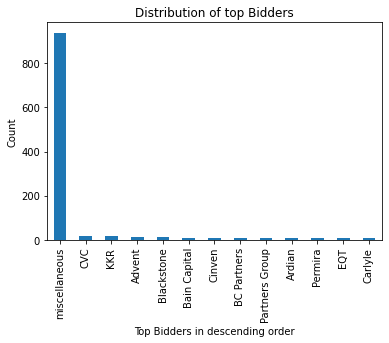

In [0]:
bid_plot=targ_bid['Bidder'].value_counts(ascending=False).plot.bar()
plt.title("Distribution of top Bidders")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Count")

In [0]:
frequencies=targ_bid['Industry'].value_counts()
condition = frequencies<20   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_bid['Industry'] = targ_bid['Industry'].replace(mask_dict)  # or you could make a copy not to modify original data

In [0]:
targ_bid['Industry'].value_counts(ascending=False)

miscellaneous                       215
Medical                             136
Energy                              132
Consumer                             99
Services                             80
Financial Services                   78
Leisure                              60
Transport                            56
Industrials                          53
Technology                           40
Industrial products and services     37
Telecommunication                    34
Biotechnology                        26
Media                                25
Name: Industry, dtype: int64

In [0]:
frequencies=targ_bid['Geography'].value_counts()
condition = frequencies<20   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_bid['Geography'] = targ_bid['Geography'].replace(mask_dict)  # or you could make a copy not to modify original data

In [0]:
targ_bid['Geography'] .value_counts(ascending=False)

UK               226
Italy            199
miscellaneous    138
France           113
Spain             99
Germany           79
Greece            61
Poland            46
Portugal          26
Romania           23
Belgium           21
Switzerland       20
Sweden            20
Name: Geography, dtype: int64

In [0]:
ind_bid=pd.crosstab(targ_bid['Bidder'], targ_bid['Industry'], margins=True, margins_name="Total")
ind_bid

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport,miscellaneous,Total
Bidder,,,,,,,,,,,,,,,
Advent,1,4,0,0,1,0,2,0,2,2,0,0,0,2,14
Ardian,0,0,0,0,1,1,0,0,3,0,0,0,1,2,8
BC Partners,0,1,0,0,0,0,0,0,1,3,1,1,0,2,9
Bain Capital,0,2,0,0,1,0,0,0,4,0,0,0,0,3,10
Blackstone,0,0,1,1,0,0,4,0,1,2,0,0,0,2,11
CVC,0,1,2,2,2,0,5,0,3,1,1,1,0,2,20
Carlyle,1,1,1,0,1,0,0,0,1,1,0,0,0,2,8
Cinven,0,1,1,0,1,0,1,0,3,0,0,0,0,3,10
EQT,1,1,0,0,0,0,1,0,2,1,0,0,0,2,8


In [0]:
ind_bid.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_bid

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport,miscellaneous,Total
Bidder,,,,,,,,,,,,,,,
Total,26,99,132,78,37,53,60,25,136,80,40,34,56,215,1071
miscellaneous,23,84,124,75,28,51,45,24,112,67,38,29,53,184,937
CVC,0,1,2,2,2,0,5,0,3,1,1,1,0,2,20
KKR,0,3,3,0,1,0,1,1,2,2,0,3,1,3,20
Advent,1,4,0,0,1,0,2,0,2,2,0,0,0,2,14
Blackstone,0,0,1,1,0,0,4,0,1,2,0,0,0,2,11
Bain Capital,0,2,0,0,1,0,0,0,4,0,0,0,0,3,10
Cinven,0,1,1,0,1,0,1,0,3,0,0,0,0,3,10
BC Partners,0,1,0,0,0,0,0,0,1,3,1,1,0,2,9


In [0]:
ind_bid.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_bid.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_bid

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport
Bidder,,,,,,,,,,,,,
CVC,0,1,2,2,2,0,5,0,3,1,1,1,0
KKR,0,3,3,0,1,0,1,1,2,2,0,3,1
Advent,1,4,0,0,1,0,2,0,2,2,0,0,0
Blackstone,0,0,1,1,0,0,4,0,1,2,0,0,0
Bain Capital,0,2,0,0,1,0,0,0,4,0,0,0,0
Cinven,0,1,1,0,1,0,1,0,3,0,0,0,0
BC Partners,0,1,0,0,0,0,0,0,1,3,1,1,0
Ardian,0,0,0,0,1,1,0,0,3,0,0,0,1
Carlyle,1,1,1,0,1,0,0,0,1,1,0,0,0


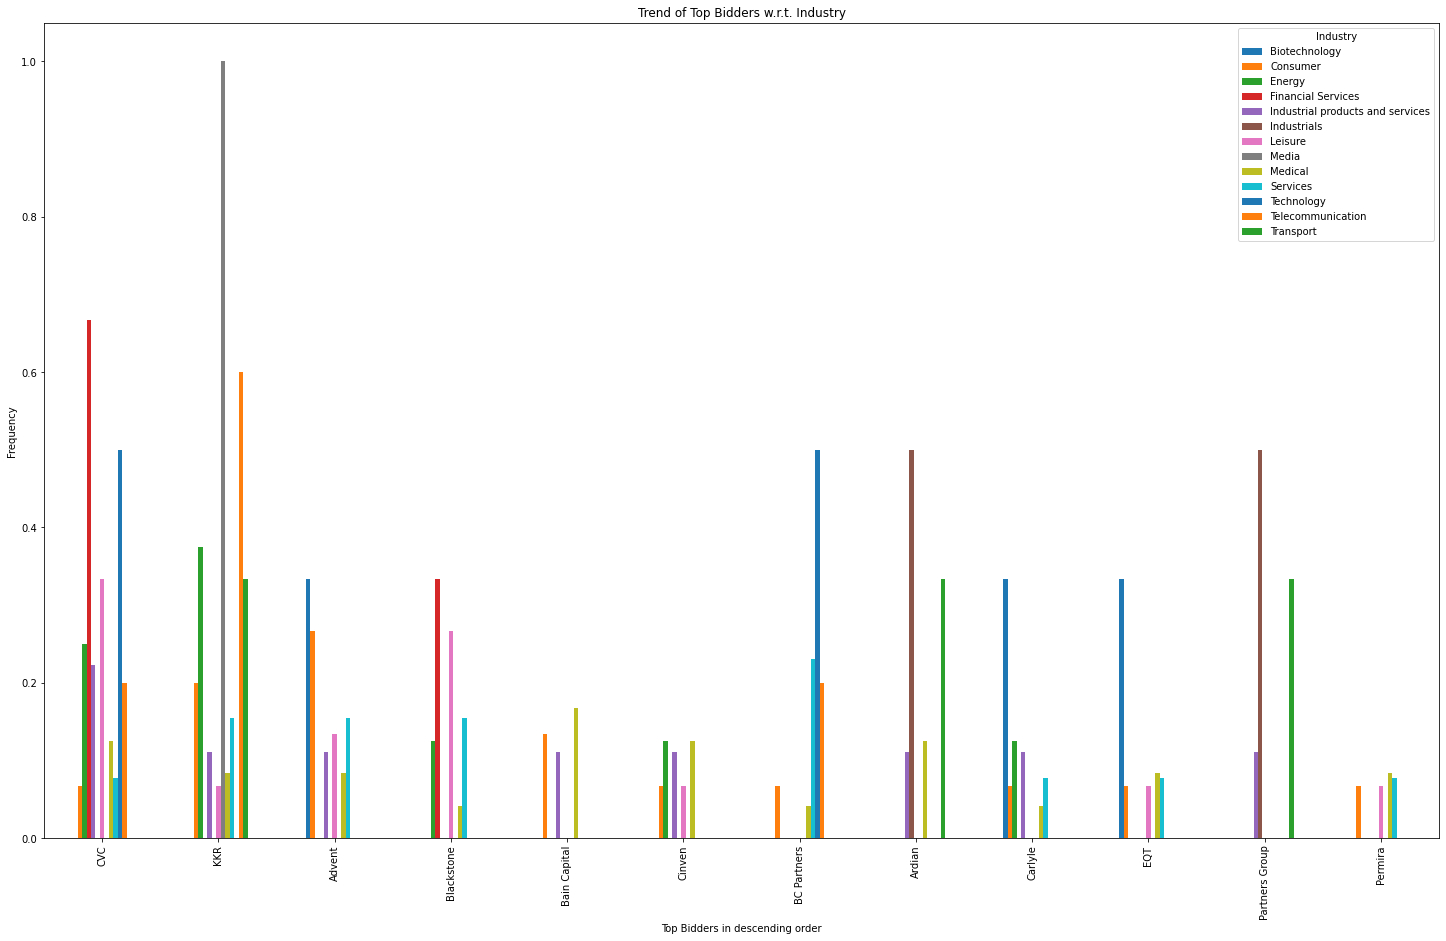

In [0]:
ind_bid.div(ind_bid.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Bidders w.r.t. Industry")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
geo_bid=pd.crosstab(targ_bid['Bidder'], targ_bid['Geography'], margins=True, margins_name="Total")
geo_bid

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Romania,Spain,Sweden,Switzerland,UK,miscellaneous,Total
Bidder,,,,,,,,,,,,,,
Advent,0,1,2,0,2,1,0,0,2,1,1,2,2,14
Ardian,0,4,0,0,1,0,1,0,1,0,0,1,0,8
BC Partners,0,2,2,1,2,0,0,0,0,0,0,2,0,9
Bain Capital,0,3,2,0,3,0,0,0,0,0,1,0,1,10
Blackstone,0,2,0,0,2,0,0,0,2,1,0,2,2,11
CVC,1,3,1,1,3,2,0,0,3,1,0,4,1,20
Carlyle,0,1,1,0,1,0,0,0,3,0,0,1,1,8
Cinven,0,0,2,0,2,0,0,1,2,0,1,0,2,10
EQT,0,2,1,0,0,0,0,0,1,1,0,0,3,8


In [0]:
geo_bid.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_bid.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_bid.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
geo_bid

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Romania,Spain,Sweden,Switzerland,UK
Bidder,,,,,,,,,,,,
CVC,1,3,1,1,3,2,0,0,3,1,0,4
KKR,0,3,3,2,1,0,0,0,5,0,0,5
Advent,0,1,2,0,2,1,0,0,2,1,1,2
Blackstone,0,2,0,0,2,0,0,0,2,1,0,2
Bain Capital,0,3,2,0,3,0,0,0,0,0,1,0
Cinven,0,0,2,0,2,0,0,1,2,0,1,0
BC Partners,0,2,2,1,2,0,0,0,0,0,0,2
Ardian,0,4,0,0,1,0,1,0,1,0,0,1
Carlyle,0,1,1,0,1,0,0,0,3,0,0,1


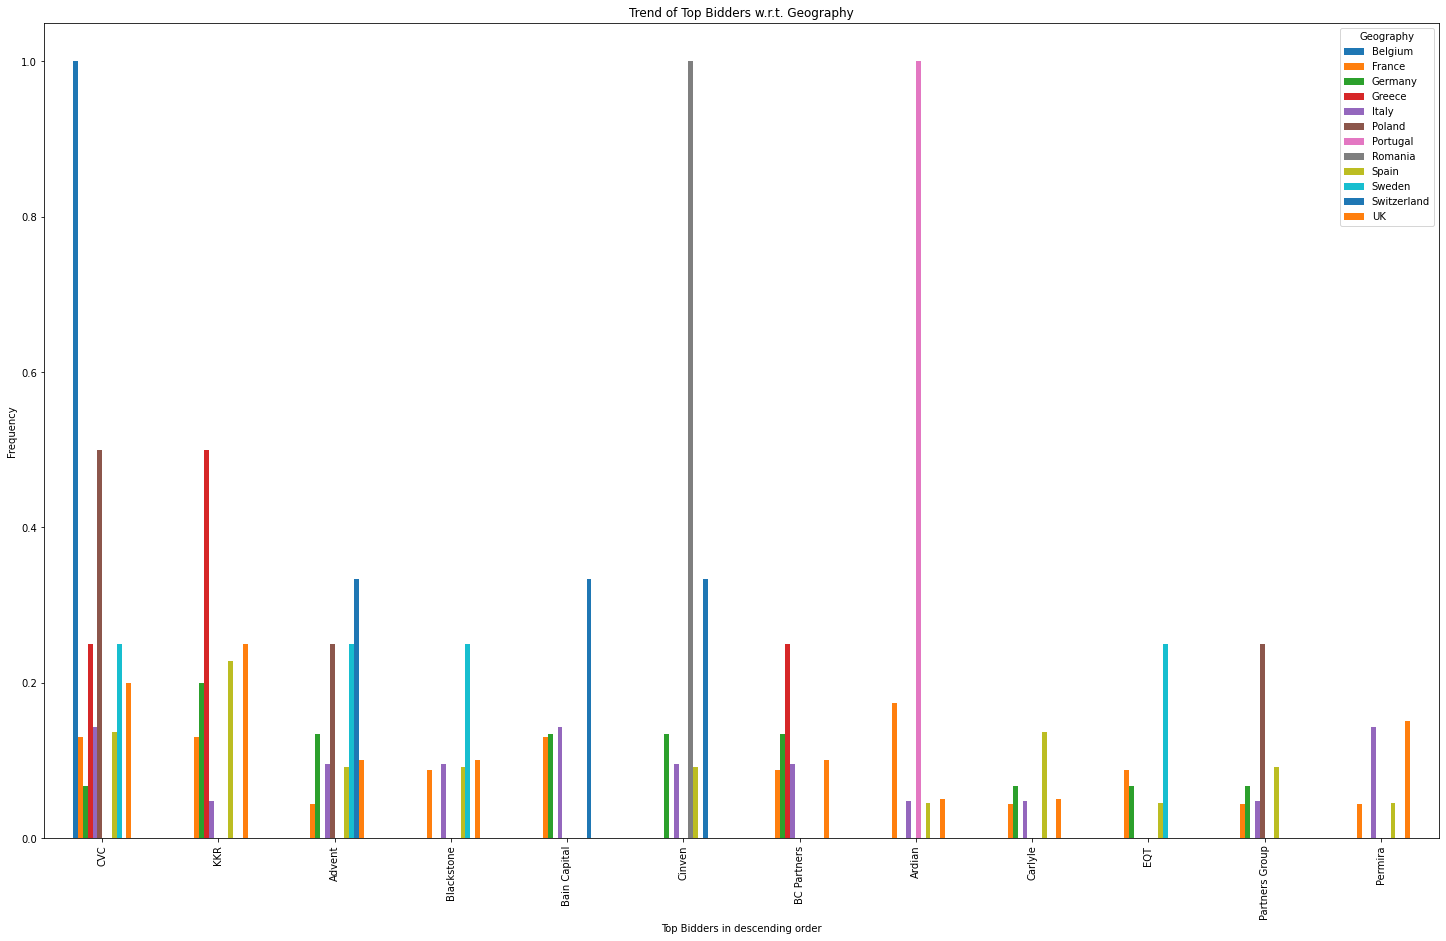

In [0]:
geo_bid.div(geo_bid.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Bidders w.r.t. Geography")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
targ_bid['Status (current/dropped out)'].value_counts()

Potential      487
Current        246
Dropped out    167
Lost            70
Won             69
dropped out     12
0                9
lost             5
won              4
2                2
Name: Status (current/dropped out), dtype: int64

In [0]:
# first of all three categories i.e. dropped out, lost, won have duplication so we need to merge into unique column values.

In [0]:
targ_bid.replace(to_replace='lost', value='Lost', inplace=True)
targ_bid.replace(to_replace='won', value='Won', inplace=True)
targ_bid.replace(to_replace='dropped out', value='Dropped out', inplace=True)

In [0]:
targ_bid['Status (current/dropped out)'].value_counts()

Potential      487
Current        246
Dropped out    179
Lost            75
Won             73
0                9
2                2
Name: Status (current/dropped out), dtype: int64

In [0]:
# Now we have effectively 5 unique status for bidders.so as before we have done, we will do same for bidders w.r.t Industry and geography with these 5 bidder statuses

In [0]:
targ_bid_pot = targ_bid[targ_bid['Status (current/dropped out)'] == 'Potential']
targ_bid_pot.shape

(487, 7)

In [0]:
targ_bid_current = targ_bid[targ_bid['Status (current/dropped out)'] == 'Current']
targ_bid_current.shape

(246, 7)

In [0]:
targ_bid_drop = targ_bid[targ_bid['Status (current/dropped out)'] == 'Dropped out']
targ_bid_drop.shape

(179, 7)

In [0]:
targ_bid_lost = targ_bid[targ_bid['Status (current/dropped out)'] == 'Lost']
targ_bid_lost.shape

(75, 7)

In [0]:
targ_bid_won = targ_bid[targ_bid['Status (current/dropped out)'] == 'Won']
targ_bid_won.shape

(73, 7)

In [0]:
ind_pot=pd.crosstab(targ_bid_pot['Bidder'], targ_bid_pot['Industry'], margins=True, margins_name="Total")
ind_pot

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,miscellaneous,Total
Bidder,,,,,,,,,,,,,,
Advent,0,1,0,0,0,0,1,0,2,1,0,0,2,7
Ardian,0,0,0,0,0,1,0,0,0,0,0,0,0,1
BC Partners,0,0,0,0,0,0,0,0,0,2,1,0,1,4
Bain Capital,0,1,0,0,0,0,0,0,2,0,0,0,2,5
Blackstone,0,0,0,0,0,0,2,0,0,2,0,0,0,4
CVC,0,1,1,0,1,0,1,0,1,1,1,0,0,7
Carlyle,0,0,0,0,0,0,0,0,0,1,0,0,0,1
Cinven,0,0,0,0,0,0,1,0,2,0,0,0,1,4
EQT,0,1,0,0,0,0,0,0,0,1,0,0,2,4


In [0]:
ind_pot.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_pot.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_pot.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_pot

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication
Bidder,,,,,,,,,,,,
Advent,0,1,0,0,0,0,1,0,2,1,0,0
CVC,0,1,1,0,1,0,1,0,1,1,1,0
Bain Capital,0,1,0,0,0,0,0,0,2,0,0,0
KKR,0,0,1,0,0,0,0,1,0,2,0,0
BC Partners,0,0,0,0,0,0,0,0,0,2,1,0
Blackstone,0,0,0,0,0,0,2,0,0,2,0,0
Cinven,0,0,0,0,0,0,1,0,2,0,0,0
EQT,0,1,0,0,0,0,0,0,0,1,0,0
Partners Group,0,0,0,0,1,0,0,0,0,0,0,0


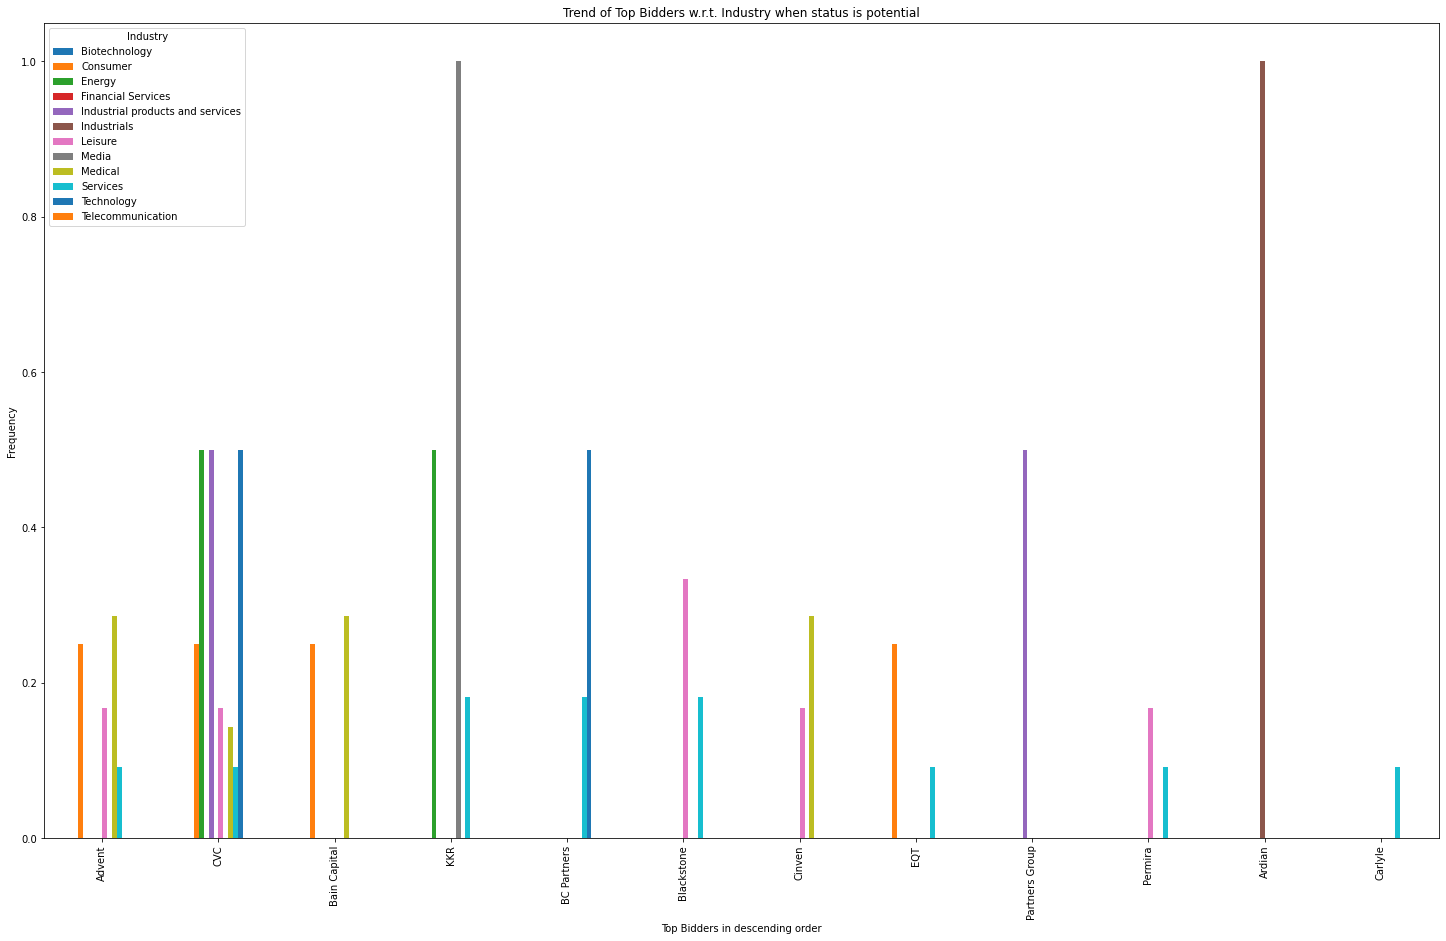

In [0]:
ind_pot.div(ind_pot.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Bidders w.r.t. Industry when status is potential")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_cur=pd.crosstab(targ_bid_current['Bidder'], targ_bid_current['Industry'], margins=True, margins_name="Total")
ind_cur

Industry,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport,miscellaneous,Total
Bidder,,,,,,,,,,,,,,
Ardian,0,0,0,1,0,0,0,1,0,0,0,0,0,2
BC Partners,1,0,0,0,0,0,0,0,0,0,1,0,0,2
Bain Capital,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Blackstone,0,0,0,0,0,1,0,0,0,0,0,0,1,2
CVC,0,0,2,0,0,1,0,1,0,0,1,0,0,5
Carlyle,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Cinven,0,1,0,0,0,0,0,0,0,0,0,0,0,1
KKR,0,1,0,0,0,1,0,0,0,0,3,1,0,6
Partners Group,0,0,0,0,0,0,0,0,0,0,0,1,1,2


In [0]:
ind_cur.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_cur.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_cur.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_cur

Industry,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport
Bidder,,,,,,,,,,,,
KKR,0,1,0,0,0,1,0,0,0,0,3,1
CVC,0,0,2,0,0,1,0,1,0,0,1,0
Ardian,0,0,0,1,0,0,0,1,0,0,0,0
BC Partners,1,0,0,0,0,0,0,0,0,0,1,0
Blackstone,0,0,0,0,0,1,0,0,0,0,0,0
Partners Group,0,0,0,0,0,0,0,0,0,0,0,1
Bain Capital,0,0,0,0,0,0,0,1,0,0,0,0
Carlyle,0,0,0,0,0,0,0,0,0,0,0,0
Cinven,0,1,0,0,0,0,0,0,0,0,0,0


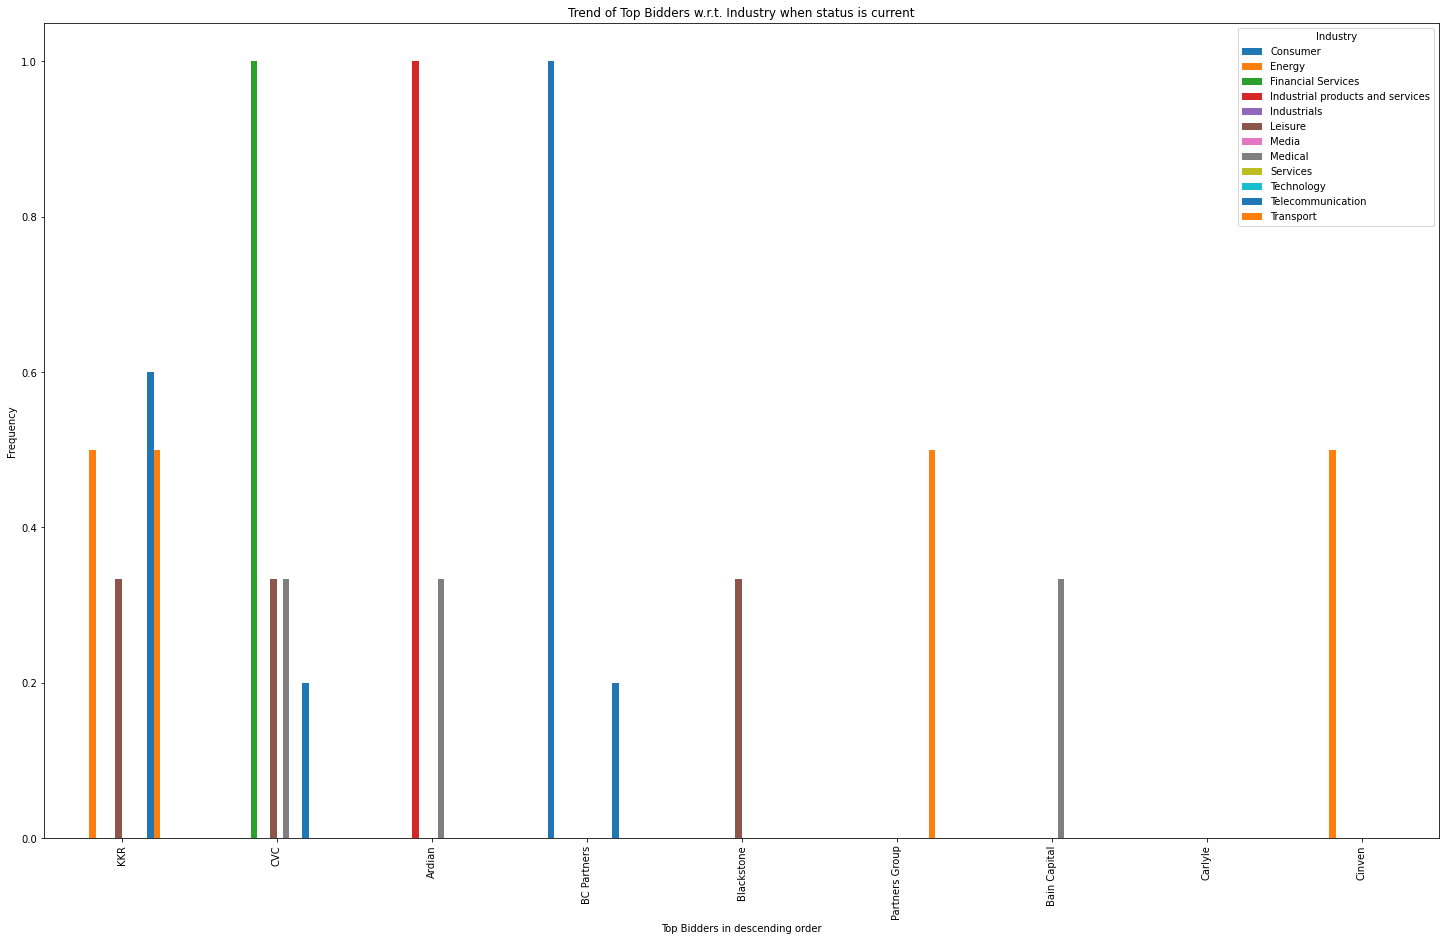

In [0]:
ind_cur.div(ind_cur.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Bidders w.r.t. Industry when status is current")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_drop=pd.crosstab(targ_bid_drop['Bidder'], targ_bid_drop['Industry'], margins=True, margins_name="Total")
ind_drop

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Medical,Services,Telecommunication,Transport,miscellaneous,Total
Bidder,,,,,,,,,,,,,
Advent,1,2,0,0,1,0,1,0,0,0,0,0,5
Ardian,0,0,0,0,0,0,0,1,0,0,0,1,2
BC Partners,0,0,0,0,0,0,0,1,1,0,0,0,2
Bain Capital,0,0,0,0,1,0,0,1,0,0,0,0,2
Blackstone,0,0,0,0,0,0,1,1,0,0,0,1,3
CVC,0,0,1,0,1,0,2,1,0,0,0,1,6
Carlyle,1,1,1,0,1,0,0,1,0,0,0,1,6
Cinven,0,1,0,0,1,0,0,1,0,0,0,1,4
EQT,0,0,0,0,0,0,1,1,0,0,0,0,2


In [0]:
ind_drop.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_drop.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_drop.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_drop

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Medical,Services,Telecommunication,Transport
Bidder,,,,,,,,,,,
KKR,0,3,1,0,1,0,0,2,0,0,0
CVC,0,0,1,0,1,0,2,1,0,0,0
Carlyle,1,1,1,0,1,0,0,1,0,0,0
Advent,1,2,0,0,1,0,1,0,0,0,0
Cinven,0,1,0,0,1,0,0,1,0,0,0
Permira,0,1,0,0,0,0,0,2,0,0,0
Blackstone,0,0,0,0,0,0,1,1,0,0,0
Ardian,0,0,0,0,0,0,0,1,0,0,0
BC Partners,0,0,0,0,0,0,0,1,1,0,0


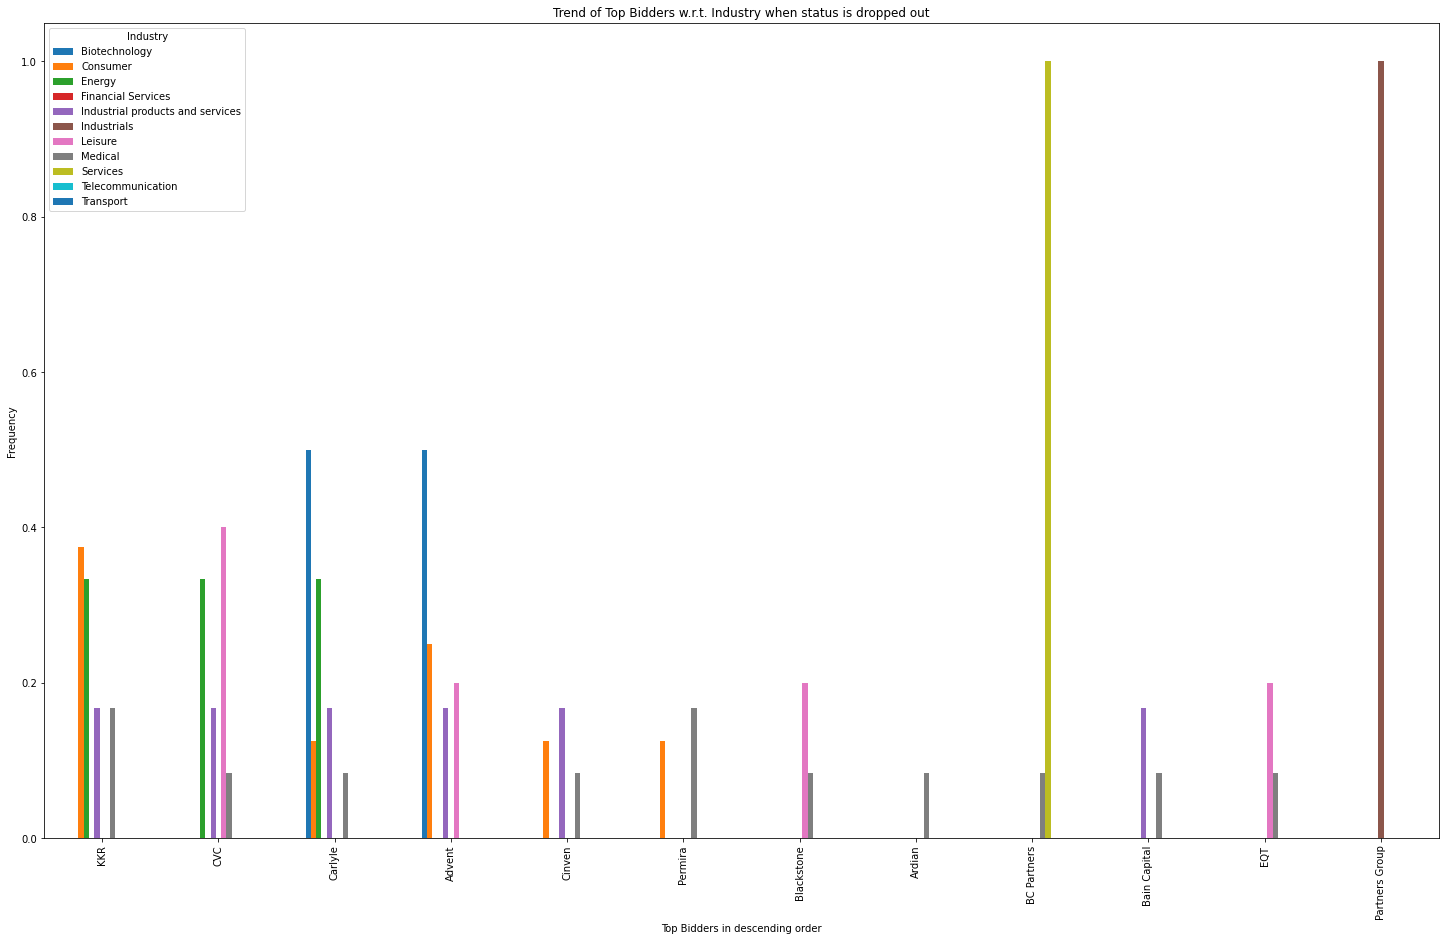

In [0]:
ind_drop.div(ind_drop.sum().astype(float)).plot(kind="bar", figsize=(25,15))
plt.title("Trend of Top Bidders w.r.t. Industry when status is dropped out")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_lost=pd.crosstab(targ_bid_lost['Bidder'], targ_bid_lost['Industry'], margins=True, margins_name="Total")
ind_lost

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrials,Medical,Services,Technology,Telecommunication,Transport,miscellaneous,Total
Bidder,,,,,,,,,,,,
Advent,0,1,0,0,0,0,0,0,0,0,0,1
Ardian,0,0,0,0,0,0,0,0,0,1,0,1
BC Partners,0,0,0,0,0,0,0,0,0,0,1,1
Bain Capital,0,1,0,0,0,0,0,0,0,0,0,1
Blackstone,0,0,1,0,0,0,0,0,0,0,0,1
CVC,0,0,0,0,0,0,0,0,0,0,1,1
EQT,1,0,0,0,0,0,0,0,0,0,0,1
KKR,0,0,0,0,0,0,0,0,0,0,1,1
miscellaneous,6,11,10,4,1,3,10,3,3,7,9,67


In [0]:
ind_lost.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_lost.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_lost.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_lost

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrials,Medical,Services,Technology,Telecommunication,Transport
Bidder,,,,,,,,,,
Advent,0,1,0,0,0,0,0,0,0,0
Ardian,0,0,0,0,0,0,0,0,0,1
BC Partners,0,0,0,0,0,0,0,0,0,0
Bain Capital,0,1,0,0,0,0,0,0,0,0
Blackstone,0,0,1,0,0,0,0,0,0,0
CVC,0,0,0,0,0,0,0,0,0,0
EQT,1,0,0,0,0,0,0,0,0,0
KKR,0,0,0,0,0,0,0,0,0,0


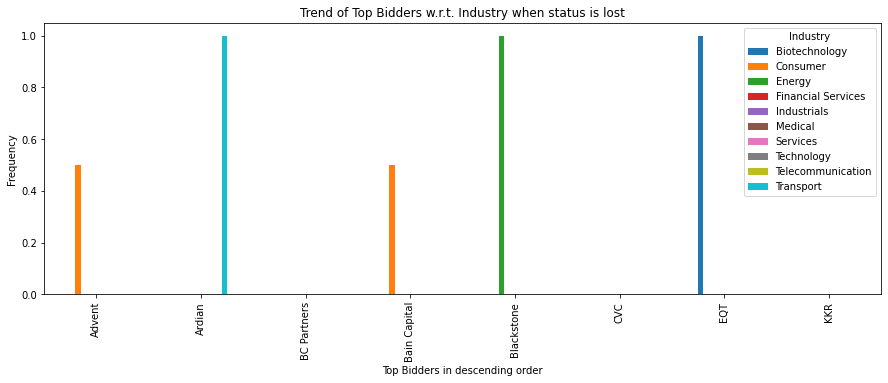

In [0]:
ind_lost.div(ind_lost.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Bidders w.r.t. Industry when status is lost")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
ind_won=pd.crosstab(targ_bid_won['Bidder'], targ_bid_won['Industry'], margins=True, margins_name="Total")
ind_won

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport,miscellaneous,Total
Bidder,,,,,,,,,,,,,,,
Ardian,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
Bain Capital,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Blackstone,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
CVC,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
Cinven,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
EQT,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
miscellaneous,4,5,8,5,1,2,2,4,3,5,4,1,3,19,66
Total,4,5,8,6,1,2,3,4,5,5,4,1,3,22,73


In [0]:
ind_won.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
ind_won.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
ind_won.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
ind_won

Industry,Biotechnology,Consumer,Energy,Financial Services,Industrial products and services,Industrials,Leisure,Media,Medical,Services,Technology,Telecommunication,Transport
Bidder,,,,,,,,,,,,,
Ardian,0,0,0,0,0,0,0,0,1,0,0,0,0
Bain Capital,0,0,0,0,0,0,0,0,0,0,0,0,0
Blackstone,0,0,0,1,0,0,0,0,0,0,0,0,0
CVC,0,0,0,0,0,0,1,0,0,0,0,0,0
Cinven,0,0,0,0,0,0,0,0,0,0,0,0,0
EQT,0,0,0,0,0,0,0,0,1,0,0,0,0


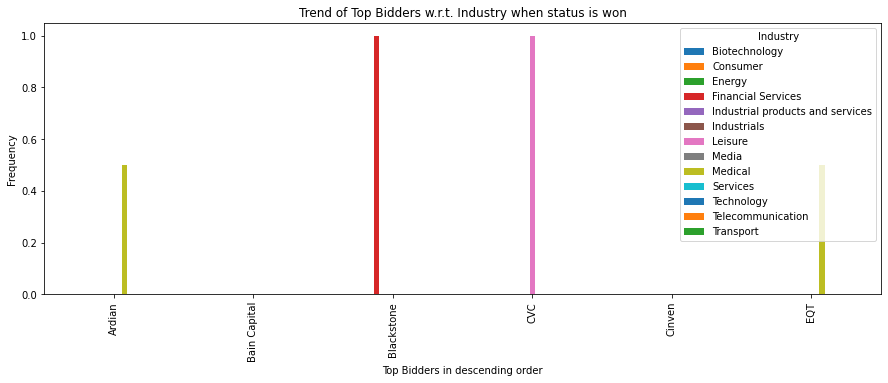

In [0]:
ind_won.div(ind_won.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Bidders w.r.t. Industry when status is won")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
geo_pot2=pd.crosstab(targ_bid_pot['Bidder'], targ_bid_pot['Geography'], margins=True, margins_name="Total")
geo_pot2

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Romania,Spain,Sweden,Switzerland,UK,miscellaneous,Total
Bidder,,,,,,,,,,,,,,
Advent,0,0,1,0,1,1,0,0,1,0,1,1,1,7
Ardian,0,1,0,0,0,0,0,0,0,0,0,0,0,1
BC Partners,0,1,1,0,1,0,0,0,0,0,0,1,0,4
Bain Capital,0,1,1,0,1,0,0,0,0,0,1,0,1,5
Blackstone,0,0,0,0,0,0,0,0,1,0,0,2,1,4
CVC,0,1,0,0,1,2,0,0,1,0,0,1,1,7
Carlyle,0,0,0,0,0,0,0,0,1,0,0,0,0,1
Cinven,0,0,0,0,1,0,0,1,0,0,1,0,1,4
EQT,0,1,0,0,0,0,0,0,1,0,0,0,2,4


In [0]:
geo_pot2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_pot2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_pot2.drop(['Total', 'miscellaneous'],1,  inplace=True)

In [0]:
geo_pot2

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Romania,Spain,Sweden,Switzerland,UK
Bidder,,,,,,,,,,,,
Advent,0,0,1,0,1,1,0,0,1,0,1,1
CVC,0,1,0,0,1,2,0,0,1,0,0,1
Bain Capital,0,1,1,0,1,0,0,0,0,0,1,0
KKR,0,1,0,1,0,0,0,0,1,0,0,2
BC Partners,0,1,1,0,1,0,0,0,0,0,0,1
Blackstone,0,0,0,0,0,0,0,0,1,0,0,2
Cinven,0,0,0,0,1,0,0,1,0,0,1,0
EQT,0,1,0,0,0,0,0,0,1,0,0,0
Partners Group,0,0,1,0,1,1,0,0,1,0,0,0


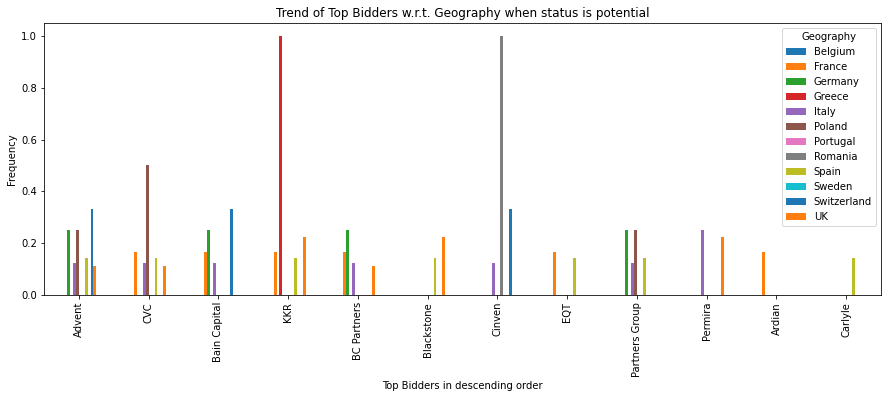

In [0]:
geo_pot2.div(geo_pot2.sum().astype(float)).plot(kind="bar", figsize=(15,5))
plt.title("Trend of Top Bidders w.r.t. Geography when status is potential")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
geo_cur2=pd.crosstab(targ_bid_current['Bidder'], targ_bid_current['Geography'], margins=True, margins_name="Total")
geo_cur2

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Spain,Sweden,Switzerland,UK,miscellaneous,Total
Bidder,,,,,,,,,,,,,
Ardian,0,2,0,0,0,0,0,0,0,0,0,0,2
BC Partners,0,0,1,1,0,0,0,0,0,0,0,0,2
Bain Capital,0,1,0,0,0,0,0,0,0,0,0,0,1
Blackstone,0,1,0,0,1,0,0,0,0,0,0,0,2
CVC,1,0,0,1,1,0,0,1,0,0,1,0,5
Carlyle,0,0,0,0,1,0,0,0,0,0,0,0,1
Cinven,0,0,0,0,0,0,0,1,0,0,0,0,1
KKR,0,0,1,1,1,0,0,2,0,0,1,0,6
Partners Group,0,1,0,0,0,0,0,0,0,0,0,1,2


In [0]:
geo_cur2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_cur2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_cur2.drop(['Total', 'miscellaneous'],1,  inplace=True)

In [0]:
geo_cur2

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Spain,Sweden,Switzerland,UK
Bidder,,,,,,,,,,,
KKR,0,0,1,1,1,0,0,2,0,0,1
CVC,1,0,0,1,1,0,0,1,0,0,1
Ardian,0,2,0,0,0,0,0,0,0,0,0
BC Partners,0,0,1,1,0,0,0,0,0,0,0
Blackstone,0,1,0,0,1,0,0,0,0,0,0
Partners Group,0,1,0,0,0,0,0,0,0,0,0
Bain Capital,0,1,0,0,0,0,0,0,0,0,0
Carlyle,0,0,0,0,1,0,0,0,0,0,0
Cinven,0,0,0,0,0,0,0,1,0,0,0


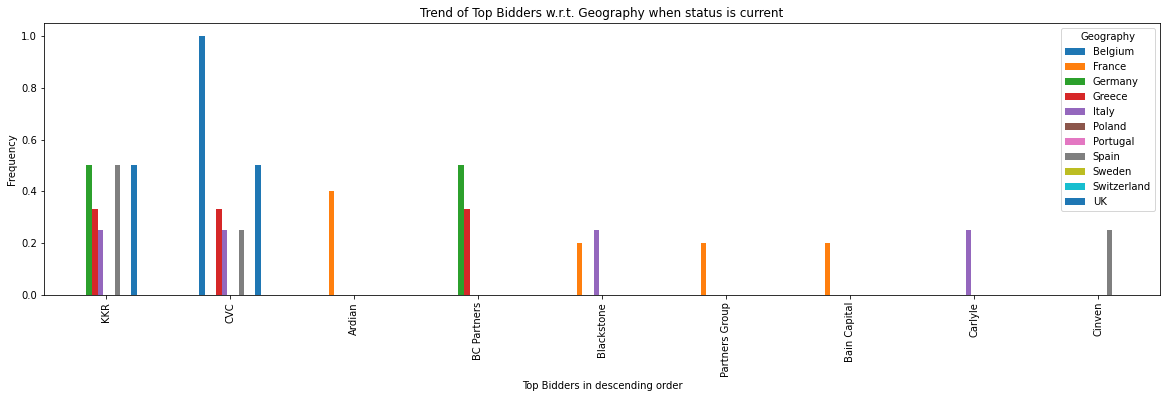

In [0]:
geo_cur2.div(geo_cur2.sum().astype(float)).plot(kind="bar", figsize=(20,5))
plt.title("Trend of Top Bidders w.r.t. Geography when status is current")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
geo_drop2=pd.crosstab(targ_bid_drop['Bidder'], targ_bid_drop['Geography'], margins=True, margins_name="Total")
geo_drop2

Geography,France,Germany,Greece,Italy,Poland,Portugal,Romania,Spain,Sweden,UK,miscellaneous,Total
Bidder,,,,,,,,,,,,
Advent,1,1,0,0,0,0,0,0,1,1,1,5
Ardian,0,0,0,1,0,0,0,1,0,0,0,2
BC Partners,1,0,0,1,0,0,0,0,0,0,0,2
Bain Capital,0,1,0,1,0,0,0,0,0,0,0,2
Blackstone,1,0,0,0,0,0,0,1,1,0,0,3
CVC,2,1,0,1,0,0,0,1,1,0,0,6
Carlyle,1,1,0,0,0,0,0,2,0,1,1,6
Cinven,0,2,0,1,0,0,0,1,0,0,0,4
EQT,1,0,0,0,0,0,0,0,1,0,0,2


In [0]:
geo_drop2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_drop2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_drop2.drop(['Total', 'miscellaneous'], 1, inplace=True)

In [0]:
geo_drop2

Geography,France,Germany,Greece,Italy,Poland,Portugal,Romania,Spain,Sweden,UK
Bidder,,,,,,,,,,
KKR,2,2,0,0,0,0,0,2,0,2
CVC,2,1,0,1,0,0,0,1,1,0
Carlyle,1,1,0,0,0,0,0,2,0,1
Advent,1,1,0,0,0,0,0,0,1,1
Cinven,0,2,0,1,0,0,0,1,0,0
Permira,1,0,0,1,0,0,0,1,0,1
Blackstone,1,0,0,0,0,0,0,1,1,0
Ardian,0,0,0,1,0,0,0,1,0,0
BC Partners,1,0,0,1,0,0,0,0,0,0


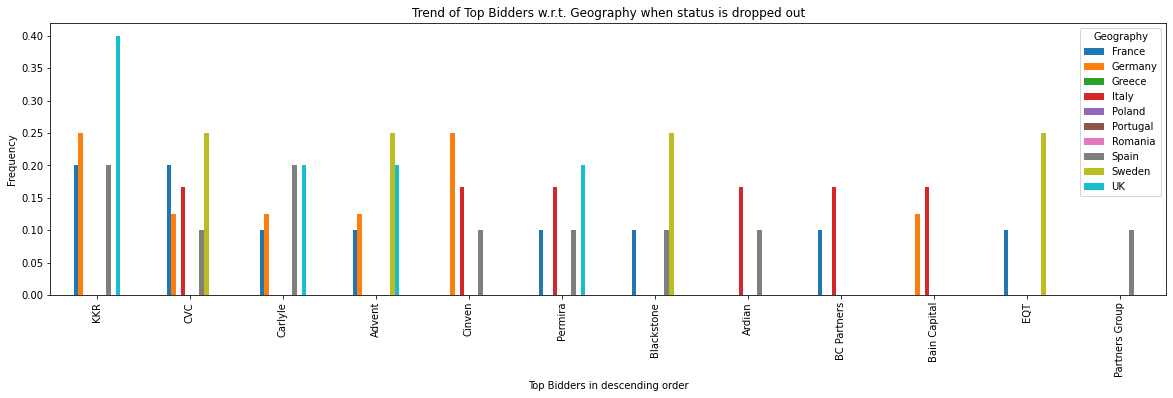

In [0]:
geo_drop2.div(geo_drop2.sum().astype(float)).plot(kind="bar", figsize=(20,5))
plt.title("Trend of Top Bidders w.r.t. Geography when status is dropped out")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
geo_lost2=pd.crosstab(targ_bid_lost['Bidder'], targ_bid_lost['Geography'], margins=True, margins_name="Total")
geo_lost2

Geography,France,Germany,Greece,Italy,Portugal,Spain,UK,miscellaneous,Total
Bidder,,,,,,,,,
Advent,0,0,0,1,0,0,0,0,1
Ardian,0,0,0,0,1,0,0,0,1
BC Partners,0,0,0,0,0,0,1,0,1
Bain Capital,1,0,0,0,0,0,0,0,1
Blackstone,0,0,0,1,0,0,0,0,1
CVC,0,0,0,0,0,0,1,0,1
EQT,0,0,0,0,0,0,0,1,1
KKR,0,0,0,0,0,0,0,1,1
miscellaneous,12,10,2,17,7,5,10,4,67


In [0]:
geo_lost2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_lost2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_lost2.drop(['Total', 'miscellaneous'],1,  inplace=True)

In [0]:
geo_lost2

Geography,France,Germany,Greece,Italy,Portugal,Spain,UK
Bidder,,,,,,,
Advent,0,0,0,1,0,0,0
Ardian,0,0,0,0,1,0,0
BC Partners,0,0,0,0,0,0,1
Bain Capital,1,0,0,0,0,0,0
Blackstone,0,0,0,1,0,0,0
CVC,0,0,0,0,0,0,1
EQT,0,0,0,0,0,0,0
KKR,0,0,0,0,0,0,0


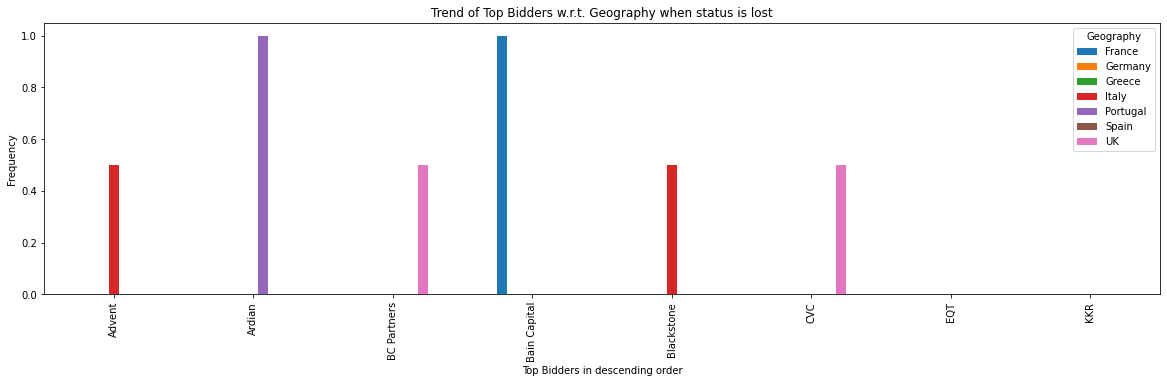

In [0]:
geo_lost2.div(geo_lost2.sum().astype(float)).plot(kind="bar", figsize=(20,5))
plt.title("Trend of Top Bidders w.r.t. Geography when status is lost")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
geo_won2=pd.crosstab(targ_bid_won['Bidder'], targ_bid_won['Geography'], margins=True, margins_name="Total")
geo_won2

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Spain,UK,miscellaneous,Total
Bidder,,,,,,,,,,,
Ardian,0,1,0,0,0,0,0,0,1,0,2
Bain Capital,0,0,0,0,1,0,0,0,0,0,1
Blackstone,0,0,0,0,0,0,0,0,0,1,1
CVC,0,0,0,0,0,0,0,0,1,0,1
Cinven,0,0,0,0,0,0,0,0,0,1,1
EQT,0,0,1,0,0,0,0,0,0,0,1
miscellaneous,2,14,7,1,11,1,3,6,10,11,66
Total,2,15,8,1,12,1,3,6,12,13,73


In [0]:
geo_won2.sort_values(by=('Total'), ascending=False, inplace=True)

In [0]:
geo_won2.drop(['Total', 'miscellaneous'], inplace=True)

In [0]:
geo_won2.drop(['Total', 'miscellaneous'],1, inplace=True)

In [0]:
geo_won2

Geography,Belgium,France,Germany,Greece,Italy,Poland,Portugal,Spain,UK
Bidder,,,,,,,,,
Ardian,0,1,0,0,0,0,0,0,1
Bain Capital,0,0,0,0,1,0,0,0,0
Blackstone,0,0,0,0,0,0,0,0,0
CVC,0,0,0,0,0,0,0,0,1
Cinven,0,0,0,0,0,0,0,0,0
EQT,0,0,1,0,0,0,0,0,0


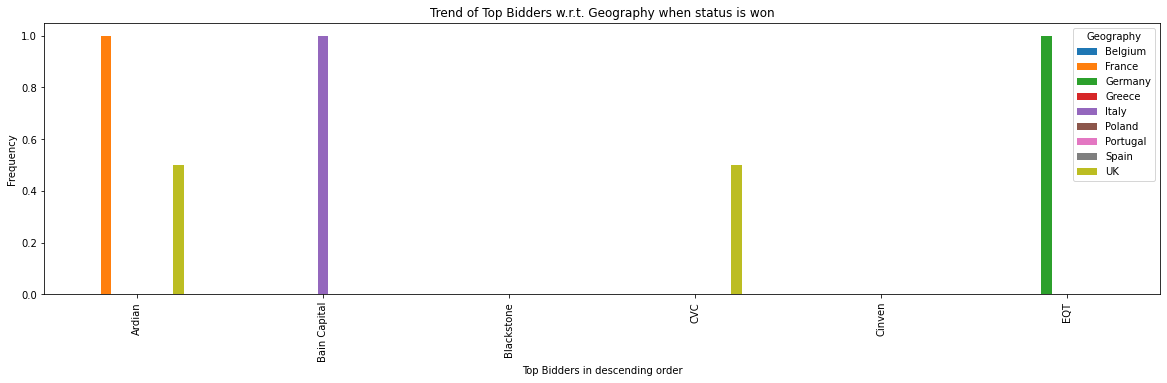

In [0]:
geo_won2.div(geo_won2.sum().astype(float)).plot(kind="bar", figsize=(20,5))
plt.title("Trend of Top Bidders w.r.t. Geography when status is won")
plt.xlabel("Top Bidders in descending order")
plt.ylabel("Frequency")
plt.show()

In [0]:
targ_cnt = pd.read_excel(excel_file, sheet_name=1, skiprows=1)

In [389]:
targ_cnt.head()

,Auction status,Reason if auction is paused/cancelled/postpone OR Deal ID for DONE auction,last intel date,Target,last reported intel,company description,Stake,Industry,Geography,Currency,Potential deal value/valuation/enterprise value (in millions),valuation multiple EBITDA,valuation multiple revenue,EBITDA (in millions),marketed off EBITDA (in millions),Revenues/sales/ losses/turnover (in millions),Rumour date of sale/auction,Auction launch,Advisory appointment,Teaser/IM circulation,1 round,Management presentation,2 round,Exclusivity,Deal Announcement,Deal debt arrangers,time since last update (check for cells with values more then or equal to 90 for MIA),Other financials desc,Other financials value,last checked date,Last Known Stage,Notes,Researcher Name
0,Done,NaN,2020-04-09,Brisa,Arcus Infrastructure Partners’ and Grupo José ...,toll-road operator,NaN,Transport,Portugal,EUR,3500,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaT,NaT,2020-04-12,NaT,NaT,NaN,50.126565,NaN,NaN,2020-04-22,2 round,NaN,NaN
1,Paused,COVID-19,2020-04-16,Egnatia,Binding bids for Greece’s Egnatia motorway con...,toll-road operator,NaN,Transport,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaT,NaT,2020-10-15,NaT,NaT,NaN,43.126565,NaN,NaN,2020-05-14,2 round,NaN,NaN
2,Live,NaN,2020-04-16,Lappeenrannan Energia,The city of Lappeenranta in Finland is conside...,Power utility,NaN,Utility,Finland,EUR,1000,NaN,NaN,39.0,NaN,105.0,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaN,43.126565,NaN,NaN,2020-05-14,NaN,NaN,NaN
3,Live,NaN,2020-04-28,Forthnet,Forthnet confirms exclusive negotiations with ...,Telecom,NaN,Telecommunication,Greece,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaT,NaT,2020-04-17,2020-04-25,NaT,NaN,31.126565,loans,310,2020-04-28,Exclusivity,NaN,NaN
4,Expected,NaN,2020-04-17,Gruppo Servizi Associati,Armonia SGR expects to initiate the sale proce...,Industrial safety and security industry,NaN,Business Services,Italy,EUR,NaN,NaN,NaN,20.0,NaN,110.0,NaT,2020-09-07,2020-05-25 00:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaN,42.126565,NaN,NaN,2020-04-24,Auction launch,NaN,NaN


In [0]:
# lets do data preprocessing.

In [391]:
targ_cnt.columns

Index(['Auction status',
       'Reason if auction is paused/cancelled/postpone OR Deal ID for DONE auction',
       'last intel date', 'Target', 'last reported intel',
       'company description', 'Stake', 'Industry', 'Geography', 'Currency',
       'Potential deal value/valuation/enterprise value  (in millions)',
       'valuation multiple EBITDA', 'valuation multiple revenue',
       'EBITDA (in millions)', 'marketed off EBITDA (in millions)',
       'Revenues/sales/ losses/turnover (in millions)',
       'Rumour date of sale/auction', 'Auction launch', 'Advisory appointment',
       'Teaser/IM circulation', '1 round', 'Management presentation',
       '2 round', 'Exclusivity', 'Deal Announcement', 'Deal debt arrangers',
       'time since last update (check for cells with values more then or equal to 90 for MIA)',
       'Other financials desc', 'Other financials value', 'last checked date',
       'Last Known Stage', 'Notes', 'Researcher Name'],
      dtype='object')

In [392]:
targ_cnt.shape

(446, 33)

In [393]:
targ_cnt.describe()

,EBITDA (in millions),marketed off EBITDA (in millions),Revenues/sales/ losses/turnover (in millions),time since last update (check for cells with values more then or equal to 90 for MIA)
count,166.000000,61.000000,211.000000,377.000000
mean,52.099892,37.842623,456.332161,308.869271
std,87.895684,55.738973,1360.977267,3193.774500
min,-4.400000,4.000000,-180.000000,4.126565
25%,7.700000,12.000000,31.500000,43.126565
50%,21.000000,20.000000,105.000000,77.126565
75%,67.250000,35.000000,338.500000,107.126565
max,792.800000,400.000000,14200.000000,43980.126565


In [394]:
targ_cnt.isnull().sum()

Auction status                                                                             3
Reason if auction is paused/cancelled/postpone OR Deal ID for DONE auction               377
last intel date                                                                            3
Target                                                                                     0
last reported intel                                                                        2
company description                                                                        4
Stake                                                                                    347
Industry                                                                                   3
Geography                                                                                  4
Currency                                                                                  20
Potential deal value/valuation/enterprise value  (in millions)        

In [0]:
# For this sheet we have to analyse targets and potential deal values based on geography and diffrerent auction status.


In [0]:
# we need to remove columns for which we dont have to analyse any trend as of now.
targ_cnt.drop(['Reason if auction is paused/cancelled/postpone OR Deal ID for DONE auction',
       'last intel date', 'last reported intel',
       'company description', 'Stake', 'Industry','Currency',
       'valuation multiple EBITDA', 'valuation multiple revenue',
       'EBITDA (in millions)', 'marketed off EBITDA (in millions)',
       'Revenues/sales/ losses/turnover (in millions)',
       'Rumour date of sale/auction', 'Auction launch', 'Advisory appointment',
       'Teaser/IM circulation', '1 round', 'Management presentation',
       '2 round', 'Exclusivity', 'Deal Announcement', 'Deal debt arrangers',
       'time since last update (check for cells with values more then or equal to 90 for MIA)',
       'Other financials desc', 'Other financials value', 'last checked date',
       'Last Known Stage', 'Notes', 'Researcher Name'],1,inplace=True)

In [0]:
targ_cnt = targ_cnt.dropna(axis=0, subset=['Geography'])
# we have target variable  geography here based on which we have analyse values and target volume.So missing value rows w.r.t. geography are of no use.

In [398]:
targ_cnt.isnull().sum()

Auction status                                                      1
Target                                                              0
Geography                                                           0
Potential deal value/valuation/enterprise value  (in millions)    237
dtype: int64

In [0]:
targ_cnt = targ_cnt.dropna(axis=0, subset=['Auction status'])  # treating missing value for auction status

In [400]:
targ_cnt.isnull().sum()

Auction status                                                      0
Target                                                              0
Geography                                                           0
Potential deal value/valuation/enterprise value  (in millions)    236
dtype: int64

In [401]:
targ_cnt.shape

(441, 4)

In [0]:
# Now as we see there are so many (almost half of data) values missing in value column.But to analyse target based on geography, we cant afford to remove such huge data.
# So we will do this three steps as below:
# 1. analysing  targets for dataset with shape(441,4) based on geography
# 2. clean missing values for value column and then analyse value trend based on geography.
# 3. based on auction status, analyse again target-geography & value-geography 

In [403]:
targ_cnt['Geography'].value_counts(ascending=False)

UK                    97
Italy                 89
France                41
Germany               41
Spain                 38
Netherlands           21
Poland                15
Switzerland            9
Sweden                 9
Finland                9
Greece                 7
Belgium                7
Denmark                6
Czech Republic         6
Norway                 5
Austria                5
Portugal               4
Romania                3
Ireland                3
US                     3
Ireland (Republic)     2
Luxembourg             2
Monaco                 2
Russia                 2
Turkey                 2
Europe                 2
Hungary                2
United Kingdom         1
Slovenia               1
Belarus                1
Croatia                1
London                 1
Australia              1
Estonia                1
Latvia                 1
Lithuania              1
Name: Geography, dtype: int64

In [0]:
targ_cnt.replace(to_replace='United Kingdom', value='UK', inplace=True)
targ_cnt.replace(to_replace='London', value='UK', inplace=True) 
targ_cnt.replace(to_replace='Ireland (Republic)', value='Ireland', inplace=True)

In [0]:
# We are taking top 6 geographcal areas to analyse values an volumes

In [0]:
frequencies=targ_cnt['Geography'].value_counts()
condition = frequencies<15   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')
targ_cnt['Geography'] = targ_cnt['Geography'].replace(mask_dict)  # or you could make a copy not to modify original data

In [407]:
targ_cnt['Geography'].value_counts()

UK               99
miscellaneous    97
Italy            89
France           41
Germany          41
Spain            38
Netherlands      21
Poland           15
Name: Geography, dtype: int64

In [0]:
targ_cnt1=targ_cnt.dropna(axis=0, subset=['Potential deal value/valuation/enterprise value  (in millions)'])

In [409]:
targ_cnt1.isnull().sum()   # we have created another dataset other than original now

Auction status                                                    0
Target                                                            0
Geography                                                         0
Potential deal value/valuation/enterprise value  (in millions)    0
dtype: int64

In [410]:
targ_cnt1.shape # dataset size has reduced to almost half in this case

(205, 4)

In [411]:
targ_cnt1.head()

,Auction status,Target,Geography,Potential deal value/valuation/enterprise value (in millions)
0,Done,Brisa,miscellaneous,3500
2,Live,Lappeenrannan Energia,miscellaneous,1000
7,Live,Green Frog Power,UK,400
8,Live,Charlotte Tilbury,UK,1000
12,Live,Autostrade per l'Italia,Italy,10000


In [412]:
targ_cnt1['Potential deal value/valuation/enterprise value  (in millions)'].unique()

array([3500, 1000, 400, 10000, 2000, 300, 456, 7500, 3000, 9100, 100,
       702.5, 200, 500, 160, 1500, 700, 600, 55, 340, 900, 2500, 7000, 70,
       3480, 30, 350, 790.4, 376, 250, 0, 2650, 1200, 15, 1750, 230, 390,
       1300, 4200, 119, 150, 25, 50, 40, 10, 800, 2405, 4000, 2300, 4400,
       550, 450, 724, 750, 215, 0.4, 950, 365, 74, 140, 9, 175, 65, 46.1,
       514.48, 330, 445, 459, 576.44, 1600, 650, 364, 90, 38, 370, 2700,
       'controlling', 'Minority', 'Undisclosed', 535, 1050, 485, 22600,
       2550, 271, 291, 5500, 460, 242, 1400], dtype=object)

In [0]:
targ_cnt1=targ_cnt1[np.isfinite(pd.to_numeric(targ_cnt1['Potential deal value/valuation/enterprise value  (in millions)'], errors="coerce"))]

In [414]:
targ_cnt1['Potential deal value/valuation/enterprise value  (in millions)'].unique()

array([3500, 1000, 400, 10000, 2000, 300, 456, 7500, 3000, 9100, 100,
       702.5, 200, 500, 160, 1500, 700, 600, 55, 340, 900, 2500, 7000, 70,
       3480, 30, 350, 790.4, 376, 250, 0, 2650, 1200, 15, 1750, 230, 390,
       1300, 4200, 119, 150, 25, 50, 40, 10, 800, 2405, 4000, 2300, 4400,
       550, 450, 724, 750, 215, 0.4, 950, 365, 74, 140, 9, 175, 65, 46.1,
       514.48, 330, 445, 459, 576.44, 1600, 650, 364, 90, 38, 370, 2700,
       535, 1050, 485, 22600, 2550, 271, 291, 5500, 460, 242, 1400],
      dtype=object)

In [0]:
#s=targ_cnt1['Potential deal value/valuation/enterprise value  (in millions)']

In [416]:
pd.to_numeric(targ_cnt1['Potential deal value/valuation/enterprise value  (in millions)'])

0       3500.0
2       1000.0
7        400.0
8       1000.0
12     10000.0
        ...   
438      242.0
441     1400.0
442     1400.0
443       50.0
444     3000.0
Name: Potential deal value/valuation/enterprise value  (in millions), Length: 201, dtype: float64

In [417]:
targ_cnt1.dtypes

Auction status                                                    object
Target                                                            object
Geography                                                         object
Potential deal value/valuation/enterprise value  (in millions)    object
dtype: object

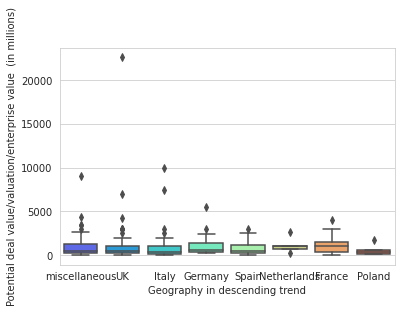

In [418]:
import matplotlib.cm as cm
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt1,palette='rainbow')
g.set(xlabel='Geography in descending trend', ylabel='Potential deal value/valuation/enterprise value  (in millions)')
plt.show()

In [0]:
# Some points can be inferred from above graph as below:
# 1. miscellaneous geography are those areas where frequency of their deals is less than 15 
# 2. Poland & Netherland has least potential deal value
# 3. UL, ITALY & GERMANY has high potential deal values.
# 4. For UK, we can say that most of the deal values are under 5000 million, but there are also some deals happened above 5000 Millions as shown in above grapph with small dark diamonds
# 5. For Itali, we can say that most of the deal values are under approx 3000 million, but there are also some deals happened above 3000 Millions as shown in above grapph with small dark diamonds
# 5. For Germany, we can say that most of the deal values are under approx 3000 million, but there is one deal happened above 3000 Millions at a bit above 5000 millions  as shown in above grapph with small dark diamonds

In [420]:
targ_cnt['Geography']. unique().sum()

'miscellaneousItalySpainUKFranceGermanyNetherlandsPoland'

In [421]:
targ_cnt['Target'].value_counts()

AEB (Afval Energie Bedrijf)      1
Credit                           1
Ferrovial's services division    1
Athens International Airport     1
Fortum Polish heating assets     1
                                ..
MapleCo                          1
Kotkamills                       1
Brisa                            1
Biscuit International            1
Glide                            1
Name: Target, Length: 441, dtype: int64

In [426]:
targ_cnt.shape

(441, 4)

In [423]:
geo1 = targ_cnt[targ_cnt['Geography'] == 'UK']
geo1.shape

(99, 4)

In [425]:
geo1['Target'].shape

(99,)

In [0]:
# since targets are as many as the shape of dataset.Therefore value counts of unique countries(geography) are volumes of target companies w.r.t. evry geography.

Text(0, 0.5, 'Count')

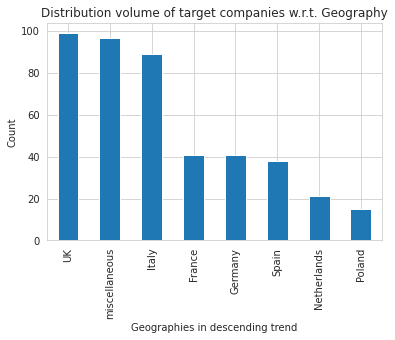

In [428]:
geo_targ_vol_plot=targ_cnt['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography")
plt.xlabel("Geographies in descending trend")
plt.ylabel("Count")

In [0]:
# Here it can be inferred that UK has maximum volume of companies and then Itali has second maximum no. of target companies volume.
# 2. Poland & Nnetherland has least volume as shown in above graph.

In [0]:
# Now we have to analyse potential deal value and volume of companies w.r.t. Geography based on different auction status.

In [431]:
targ_cnt['Auction status'].value_counts()

Expected       165
Live           138
Done            49
Paused          33
Cancelled       28
Postponed       18
Current          9
Dropped out      1
Name: Auction status, dtype: int64

In [433]:
targ_cnt_exp = targ_cnt[targ_cnt['Auction status'] == 'Expected']
targ_cnt_exp.shape

(165, 4)

In [434]:
targ_cnt_live = targ_cnt[targ_cnt['Auction status'] == 'Live']
targ_cnt_live.shape

(138, 4)

In [435]:
targ_cnt_done = targ_cnt[targ_cnt['Auction status'] == 'Done']
targ_cnt_done.shape

(49, 4)

In [436]:
targ_cnt_pause = targ_cnt[targ_cnt['Auction status'] == 'Paused']
targ_cnt_pause.shape

(33, 4)

In [437]:
targ_cnt_cancel = targ_cnt[targ_cnt['Auction status'] == 'Cancelled']
targ_cnt_cancel.shape

(28, 4)

In [438]:
targ_cnt_post = targ_cnt[targ_cnt['Auction status'] == 'Postponed']
targ_cnt_post.shape

(18, 4)

In [440]:
targ_cnt_current = targ_cnt[targ_cnt['Auction status'] == 'Current']
targ_cnt_current.shape

(9, 4)

In [441]:
targ_cnt_drop = targ_cnt[targ_cnt['Auction status'] == 'Dropped out']
targ_cnt_drop.shape

(1, 4)

In [0]:
# Now lets plot volume of companies w.r.t geographies based on every auction status

Text(0, 0.5, 'Count')

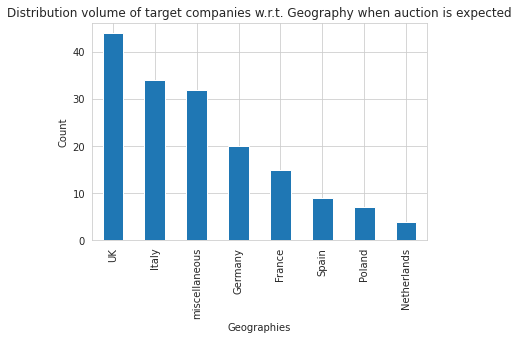

In [445]:
geo_targ_vol_exp=targ_cnt_exp['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is expected")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

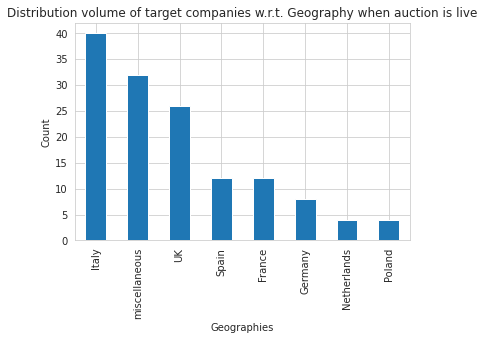

In [446]:
geo_targ_vol_live=targ_cnt_live['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is live")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

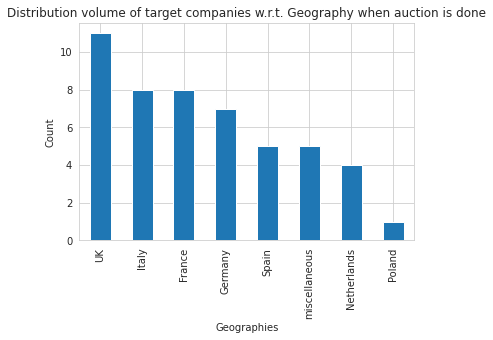

In [447]:
geo_targ_vol_done=targ_cnt_done['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is done")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

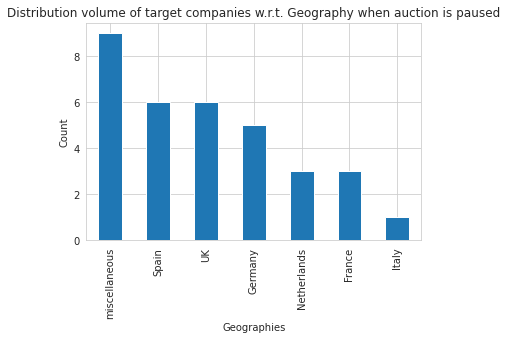

In [448]:
geo_targ_vol_pause=targ_cnt_pause['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is paused")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

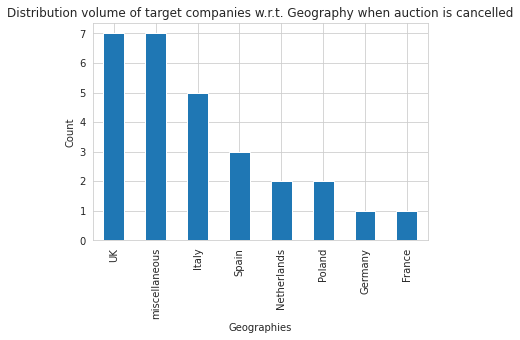

In [449]:
geo_targ_vol_cancel=targ_cnt_cancel['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is cancelled")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

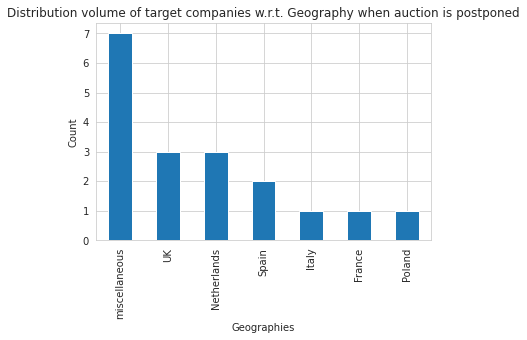

In [450]:
geo_targ_vol_post=targ_cnt_post['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is postponed")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

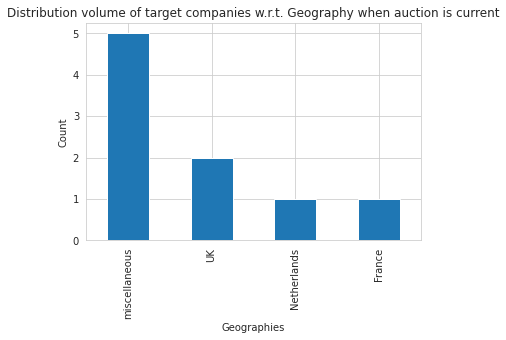

In [451]:
geo_targ_vol_current=targ_cnt_current['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is current")
plt.xlabel("Geographies")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

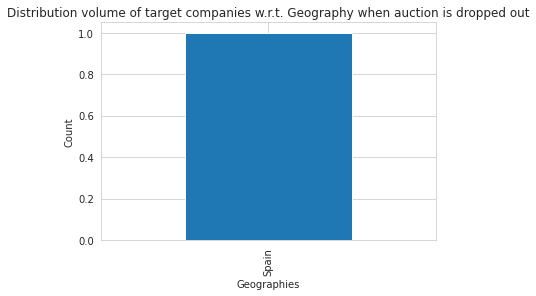

In [452]:
geo_targ_vol_drop=targ_cnt_drop['Geography'].value_counts().plot.bar()
plt.title("Distribution volume of target companies w.r.t. Geography when auction is dropped out")
plt.xlabel("Geographies")
plt.ylabel("Count")

In [0]:
# Now we will analyse deal values w.r.t. geography based on different auction status

In [454]:
targ_cnt1['Auction status'].value_counts()

Expected     56
Live         55
Done         37
Paused       19
Cancelled    16
Postponed    10
Current       8
Name: Auction status, dtype: int64

In [455]:
targ_cnt_exp1 = targ_cnt1[targ_cnt1['Auction status'] == 'Expected']
targ_cnt_exp1.shape

(56, 4)

In [456]:
targ_cnt_live1 = targ_cnt1[targ_cnt1['Auction status'] == 'Live']
targ_cnt_live1.shape

(55, 4)

In [457]:
targ_cnt_done1 = targ_cnt1[targ_cnt1['Auction status'] == 'Done']
targ_cnt_done1.shape

(37, 4)

In [458]:
targ_cnt_pause1 = targ_cnt1[targ_cnt1['Auction status'] == 'Paused']
targ_cnt_pause1.shape

(19, 4)

In [460]:
targ_cnt_cancel1 = targ_cnt1[targ_cnt1['Auction status'] == 'Cancelled']
targ_cnt_cancel1.shape

(16, 4)

In [461]:
targ_cnt_post1 = targ_cnt1[targ_cnt1['Auction status'] == 'Postponed']
targ_cnt_post1.shape

(10, 4)

In [462]:
targ_cnt_current1 = targ_cnt1[targ_cnt1['Auction status'] == 'Current']
targ_cnt_current1.shape

(8, 4)

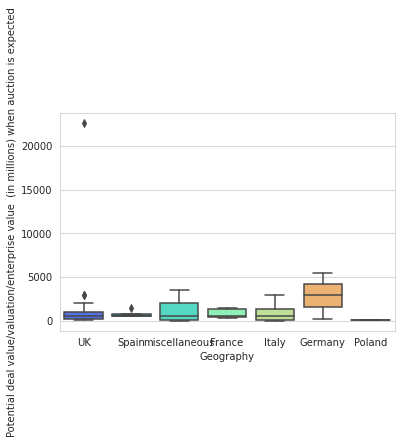

In [464]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_exp1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is expected')
plt.show()

In [0]:
# When auction is expected, Germany has maximum deal value approx 6000 million

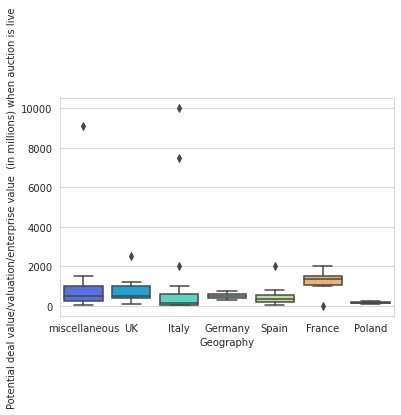

In [465]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_live1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is live')
plt.show()

In [0]:
# When auction is live, UK has maximum deal value approx 2500 million

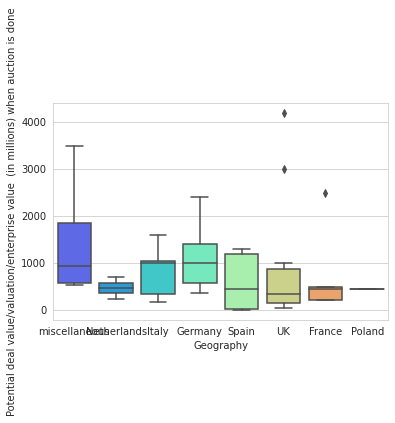

In [466]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_done1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is done')
plt.show()

In [0]:
# When auction is done, Germany has maximum deal value 1300 million

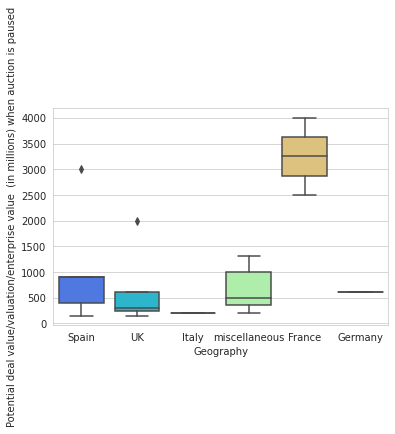

In [467]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_pause1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is paused')
plt.show()

In [0]:
# When auction is paused, France has maximum deal value 4000 million,Spain has maximum deal value approx 1000 million, Uk has approx 700 million

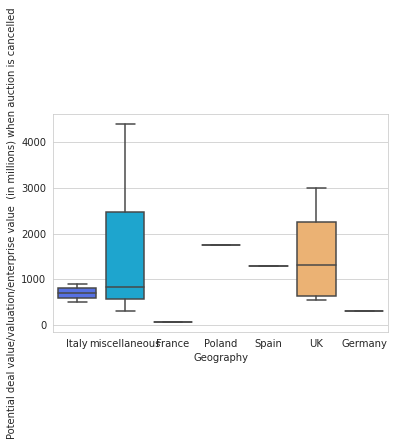

In [468]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_cancel1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is cancelled')
plt.show()

In [0]:
# When auction is cancelled, UK has maximum deal value 3000 million & Italy has max deal value approx 1000 millions

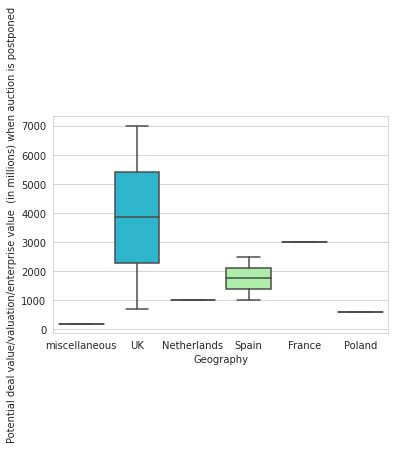

In [469]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_post1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is postponed')
plt.show()

In [0]:
# When auction is postponed, UK has maximum deal value  nearly about 7000 million and spain with maximum deal value 2500 millions 

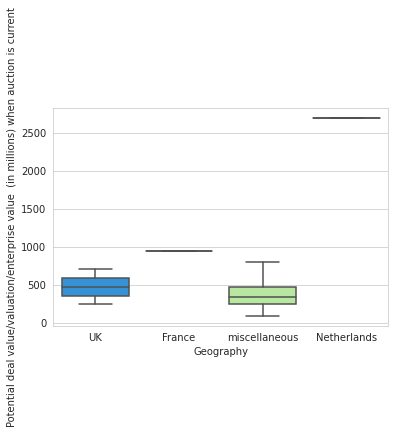

In [470]:
sns.set_style("whitegrid") 
g=sns.boxplot(x='Geography',y='Potential deal value/valuation/enterprise value  (in millions)',data=targ_cnt_current1,palette='rainbow')
g.set(xlabel='Geography', ylabel='Potential deal value/valuation/enterprise value  (in millions) when auction is current')
plt.show()

In [0]:
# When auction is current, UK has maximum deal value  naerly about 1250 million